# Non-linear Interpretability

The key to interpretable machine learning

1. explanation should be interpretable
2. number of explanations should be low (low entropy on possible explanations)

Assume $D = \{(x_i, y_i)\}_{i=1}^{|D|}$, then we have the following optimization function (denote $z$ as explanation)

$cost(D) = \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)$

where $x$ is the input, $y$ is the output, $L$ is the data loss function, and $\mathcal{H}(z)$ is entropy and $\alpha>0$ is tradeoff parameter

Based on this design guideline, we propose the following generalized linear interpretable model:

![model_pipeline](presentations/unifiying_view_credibility.png )

The model has two components, the switch network (parametrized by $\theta_s$ and output explanation probability $p(z|x)$) and the weight network (parametrized by $\theta_w$ and output parameters of an interpretable model f). 

Assuming the switch network and the function network are differentiable, we can derive the update gradient for $\theta_s$ and $\theta_w$.

\begin{align}
    \frac{\partial{cost(D)}}{\partial \theta_s} &= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \frac{\partial \sum_{x,y,z} p(x,y) p(z|x) L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \sum_{z} L(x, y, z) \frac{ \partial p(z|x)}{\partial \theta_s} + \alpha  \frac{\partial \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} + \alpha \frac{\partial \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \frac{\partial \sum_{z} p(z) \log p(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) \frac{\partial p(z)}{\partial \theta_s} + p(z) \frac{\partial \log p(z)}{\partial \theta_s}) \\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial p(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial \sum_{x,y} p(x,y,z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial \sum_{x,y} p(x,y)p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \sum_{x,y} p(x,y) \frac{\partial p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{x,y} p(x,y) \sum_{z} (\log p(z) + 1) \frac{\partial p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \mathbb{E}_{x,y} \mathbb{E}_{z|x} (\log p(z) + 1) \frac{\partial \log p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y}\mathbb{E}_{z|x} (L(x, y, z) - \alpha \log p(z) - \alpha) \frac{\partial \log p(z|x)}{\partial \theta_s}
\end{align}

\begin{align}
    \frac{\partial{cost(D)}}{\partial \theta_w} &= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_w}\\
&= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z)}{\partial \theta_w}\\
&= \mathbb{E}_{x,y,z} \frac{\partial L(x, y, z)}{\partial \theta_w}
\end{align}

## design choices

For simplicty, we only consider a line as the output of the weight network. We could try other atomic structures such as  circle 

We consider 3 variant  of the switch network (assuming $z \in \mathbb{R}^K$)

1. the last layer of the switch network is a softmax ($z$ being a one hot vector)
2. the last layer of the switch network is multiple sigmoid functions ($p(z|x) = \Pi_{k=1}^K p(z_k|x)$)
3. the switch network is implemented by an rnn ($p(z|x) = \Pi_{k=1}^K p(z_k|x,z_{1:k-1})$)

Obviously, variant 3 is the most general because it computes the full probability while variant 2 assumes digits of z  are independently generated given the input. Variant 1 is also general but it can only hold $K$ explanations, whereas the other two can hold $2^K$ number of explanations so that they are more memory efficient.

We consider the following environment to run our experiment

- Triangle world (to test a world where only 3 line suffices)
- Egg world (to test a world where potentially infinite lines are needed)
- Island in the sea (to fail input gradient)
- Big and small islands (to fail counterfactual explanation)
- Randomly many islands (to get intuition on the model)


## interesting observations

The current model has the following properties

1. low number of explanations
2. $f_i$ are interpretable for $i\in\{0 \cdots K\}$ 

Though this looks good, it does not give the intended effect. Why is that?

Define $X_{f_i} := \{x \in \mathcal{X}: arg\max_i p(z_i|x)\}$ partitions input space $\mathcal{X}$

The problem is $y_{f_i}$ may only contain one class so that it is trivial for $\theta_w$ (have arbitrarily non interpretable model to classify) to correctly label data.

Another issue is the cluster (switch) assignment may not be local in the original input space. We cannot force $X_{f_i}$ to be continuous. The only hope for continuous input space is for the switch network to be simple.

We can solve problem 1 by adding $-\beta H(y|z)$ to the cost function. For problem 2, we need to think carefully (assign points to the nearest classifier does not work: try the triangle environment)


\begin{align}
    -\frac{\partial H(y|z)}{\partial \theta_s} &= \frac{\partial \mathbb{E}_z \sum_{y} p(y|z) \log p(y|z)}{\partial \theta_s}\\
    &= \frac{\partial \sum_{z} \sum_{x} p(z|x) p(x) \sum_{y} p(y|z) \log p(y|z)}{\partial \theta_s}\\
    &= \frac{\partial \mathbb{E}_{x} \sum_{z} p(z|x) \sum_{y} p(y|z) \log p(y|z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x} \sum_{z} \sum_{y} p(y|z) \log p(y|z) \frac{\partial  p(z|x) }{\partial \theta_s}\\
    &= \mathbb{E}_{x} \mathbb{E}_{z|x} \sum_{y} p(y|z) \log p(y|z) \frac{\partial  \log p(z|x) }{\partial \theta_s}
\end{align}

\begin{align}
    -\frac{\partial H(y|z)}{\partial \theta_w} = 0
\end{align}



In [28]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import seaborn as sns
from lib.train import InterpretableTrainer, Trainer
from torch.utils.data import Dataset, DataLoader, TensorDataset
from lib.model import Switch, Weight, apply_linear
from lib.utility import logit_elementwise_loss
from lib.utility import plotDecisionSurface, to_var, to_np, check_nan, onehotize, to_cuda
from lib.utility import genCovX
from lib.model import WeightIndependent
from itertools import product
import os
from lib.parallel_run import map_parallel

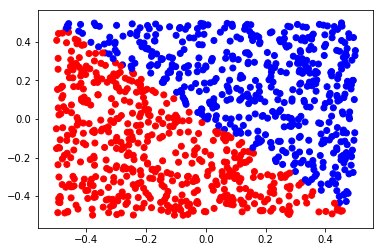

In [8]:
# instance: triangle_test_small_b1_s3
def build_line(n=10):  
    X = np.random.rand(n, 2)-0.5
#     X1 = np.random.rand(int(n/2), 2)-0.5
#     X2 = np.random.rand(int(n/2), 2)*0.2-0.1
#     X = np.vstack((X1, X2))
    
    # assume l1, l2, and l3 are the parameters of a line
    # e.g. [theta1, theta2, b]: theta1 x1 + theta2 x2 + b <= 0
    lines = [[1,1,0]]#, [-1, 1, -0.25], [0, -1, -0.25]]
    y = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y = np.logical_and((X.dot([t1, t2]) + b) <= 0, y)
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_line(n)
plotData(X, Y)

0.01% (0m 0s) 0.7698


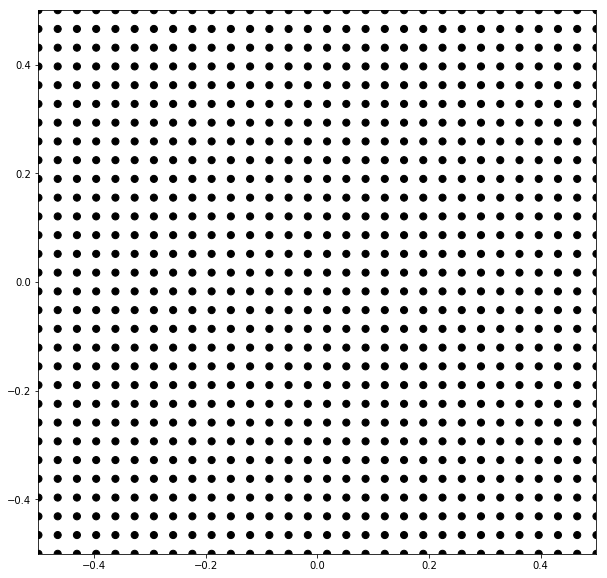

probability of choosing r is 1.0
p(y=-1|z="r") is 0.49000000953674316


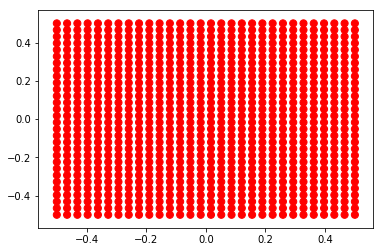

1.35% (0m 4s) 0.2343


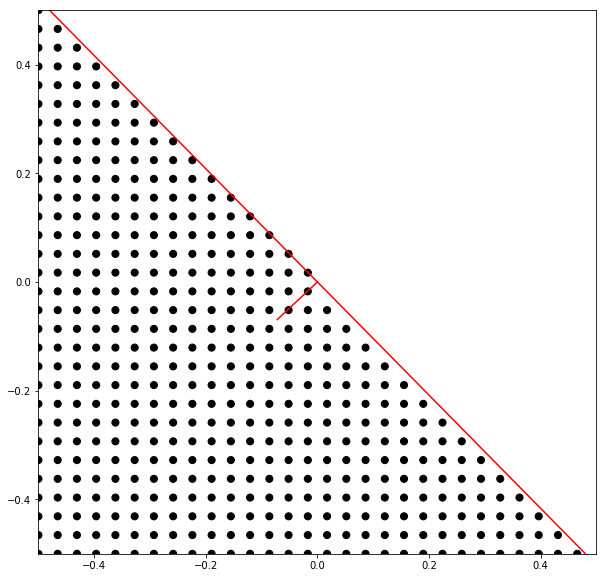

probability of choosing r is 1.0
p(y=-1|z="r") is 0.5099999904632568


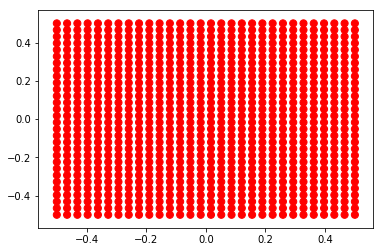

2.68% (0m 8s) 0.1389


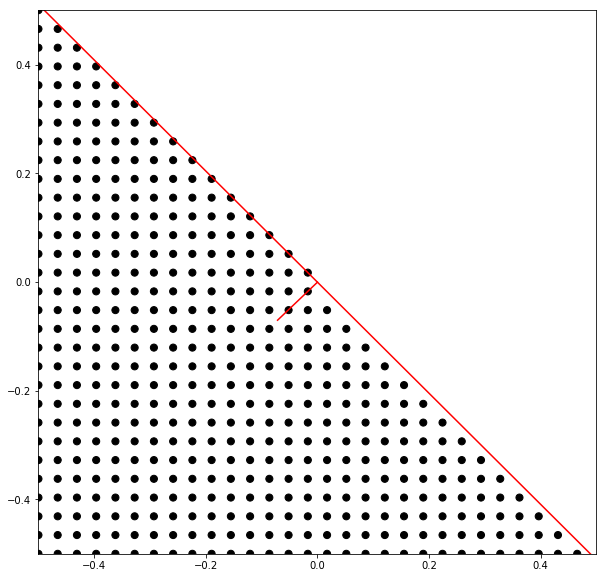

probability of choosing r is 1.0
p(y=-1|z="r") is 0.4749999940395355


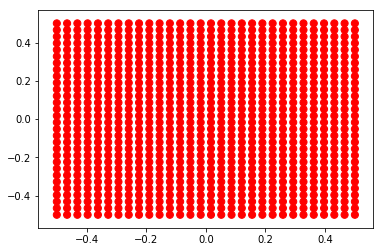

4.01% (0m 12s) 0.1335


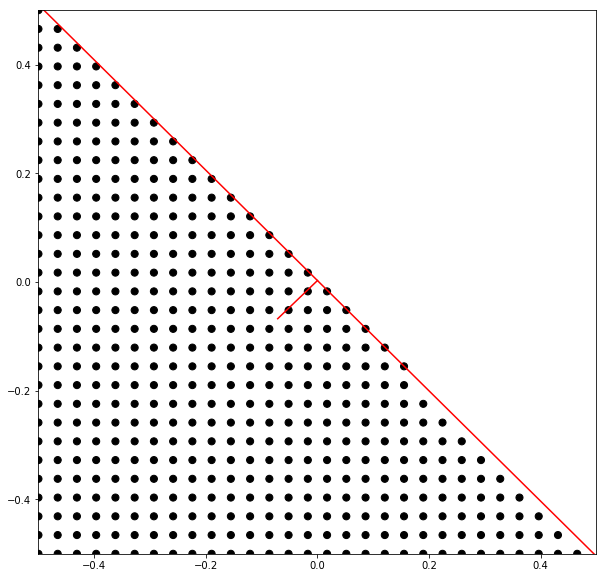

probability of choosing r is 1.0
p(y=-1|z="r") is 0.4650000035762787


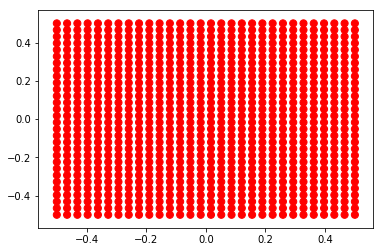

5.35% (0m 16s) 0.1143


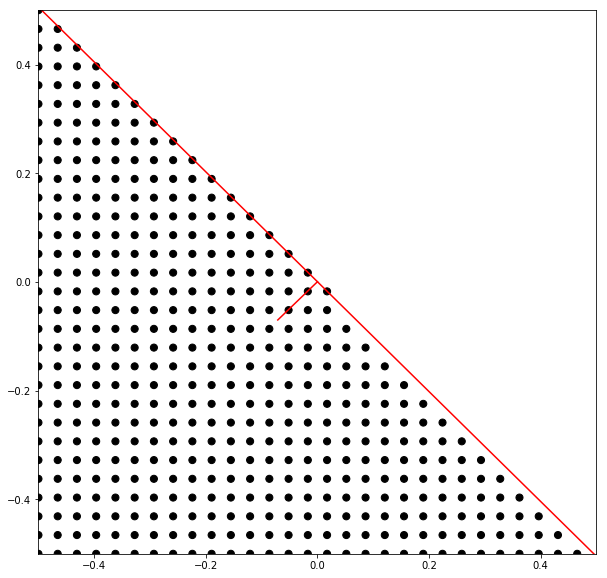

probability of choosing r is 1.0
p(y=-1|z="r") is 0.5799999833106995


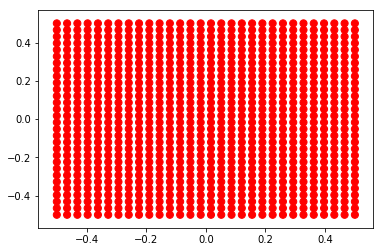

6.68% (0m 21s) 0.0979


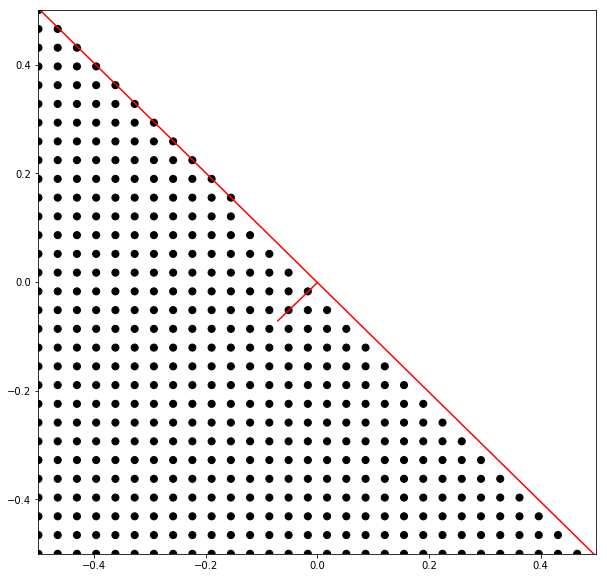

probability of choosing r is 1.0
p(y=-1|z="r") is 0.4699999988079071


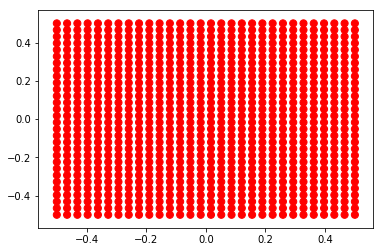

8.01% (0m 25s) 0.0891


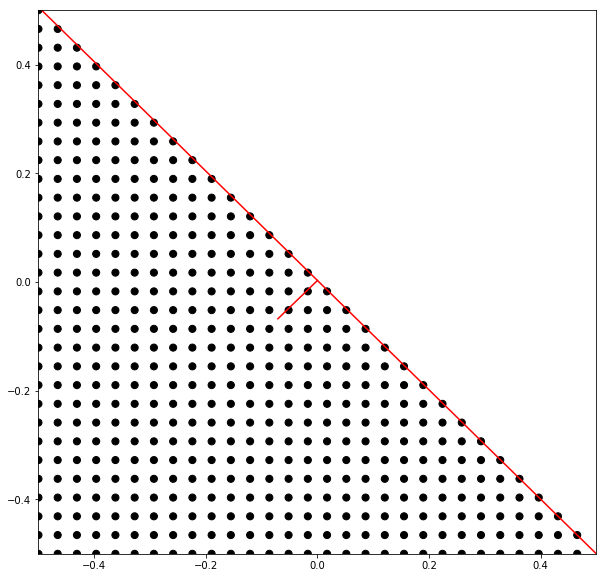

probability of choosing r is 1.0
p(y=-1|z="r") is 0.42500001192092896


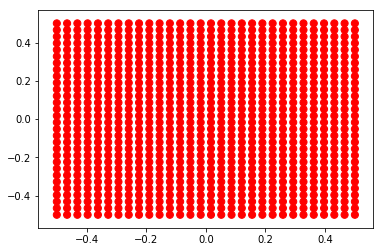

9.35% (0m 30s) 0.0956


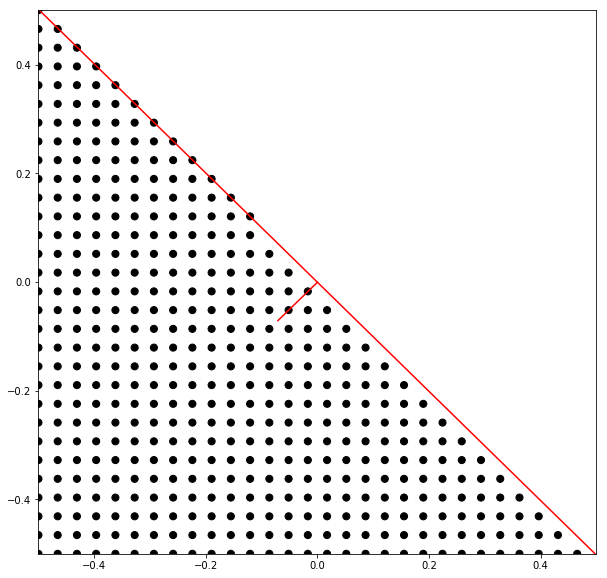

probability of choosing r is 1.0
p(y=-1|z="r") is 0.48500001430511475


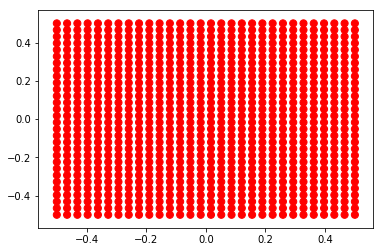

10.68% (0m 34s) 0.0910


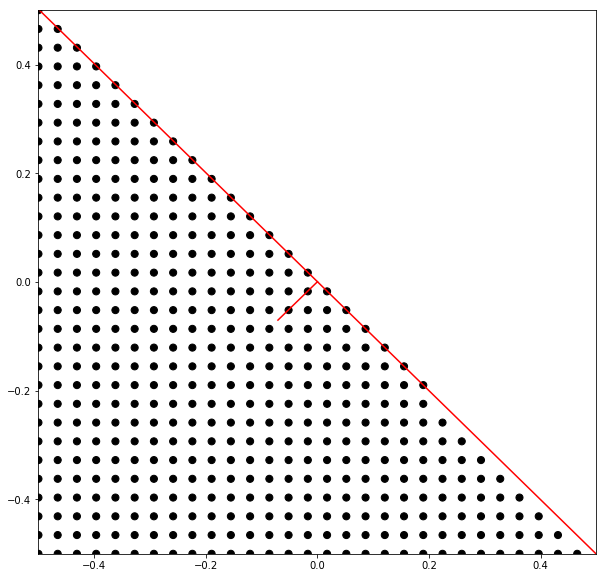

probability of choosing r is 1.0
p(y=-1|z="r") is 0.5149999856948853


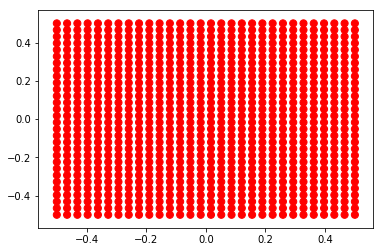

12.01% (0m 38s) 0.0689


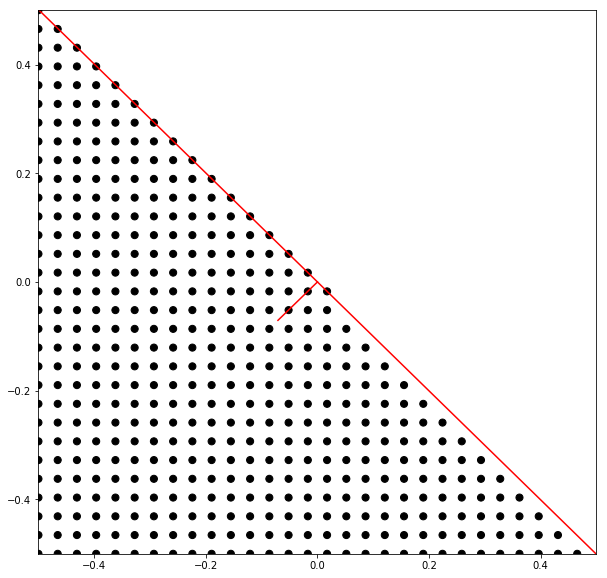

probability of choosing r is 1.0
p(y=-1|z="r") is 0.47999998927116394


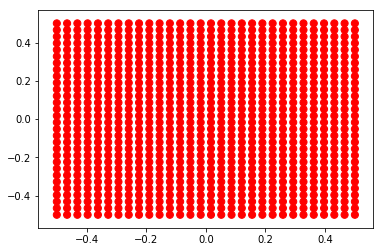

13.35% (0m 43s) 0.0520


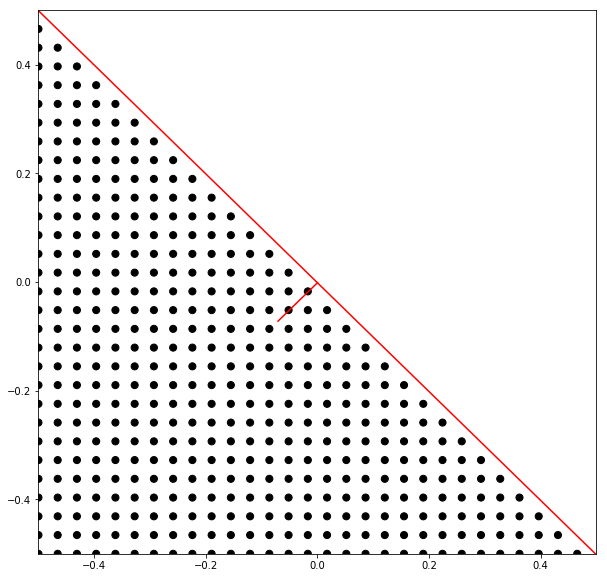

probability of choosing r is 1.0
p(y=-1|z="r") is 0.4749999940395355


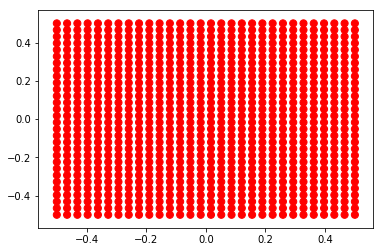

14.68% (0m 48s) 0.0654


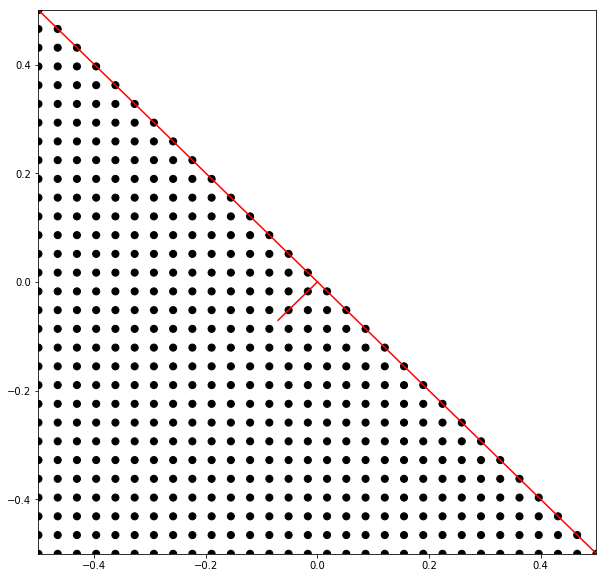

probability of choosing r is 1.0
p(y=-1|z="r") is 0.4399999976158142


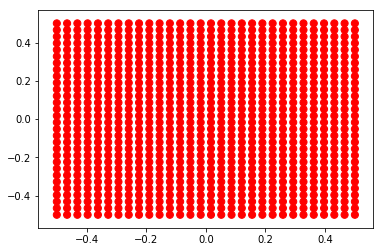

16.01% (0m 52s) 0.0569


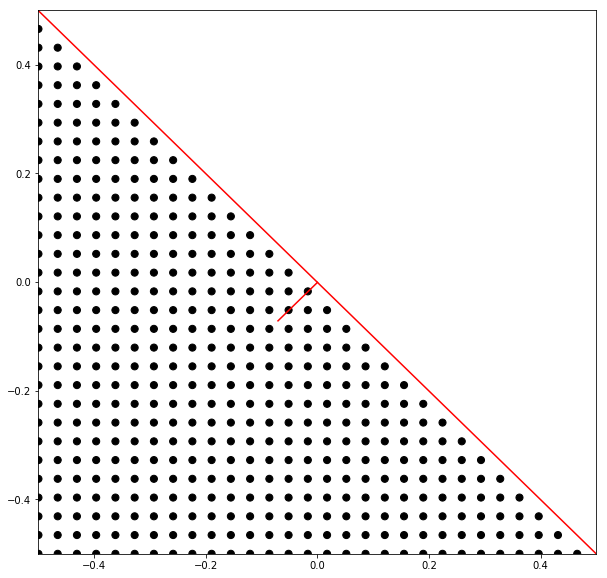

probability of choosing r is 1.0
p(y=-1|z="r") is 0.5299999713897705


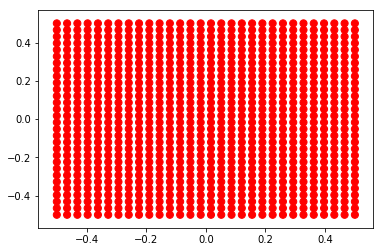

17.35% (0m 56s) 0.0605


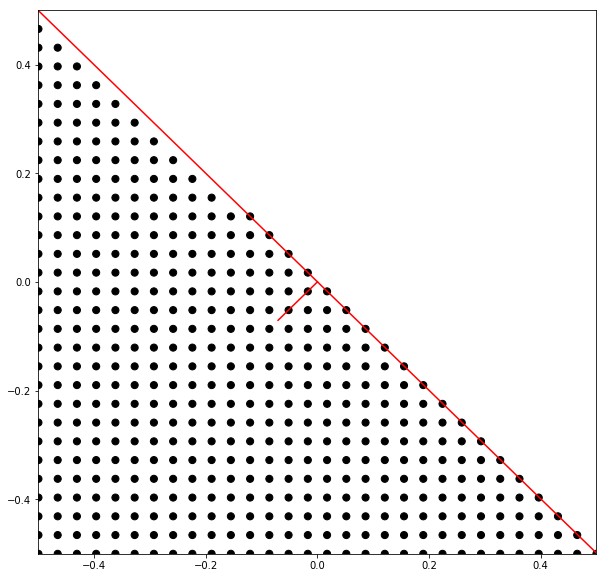

probability of choosing r is 1.0
p(y=-1|z="r") is 0.5049999952316284


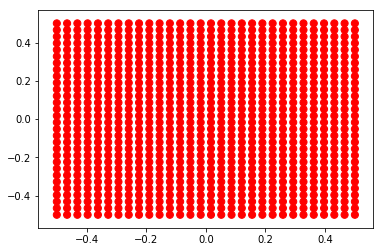

[0.7697798013687134,
 0.23433826863765717,
 0.13894347846508026,
 0.1334579437971115,
 0.11430848389863968,
 0.09792688488960266,
 0.08913814276456833,
 0.09561735391616821,
 0.09099193662405014,
 0.06890477240085602,
 0.05195389688014984,
 0.06537685543298721,
 0.05689380317926407,
 0.06045867130160332,
 0.06194409355521202]

In [10]:
input_size = 2 # 2d input
switch_size = 1 # can only output 1 lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

switch = Switch(input_size, switch_size)
weight = WeightIndependent(switch_size, input_size+1) # +1 for b in linear model

max_grad = None
alpha = -0 # -0.5; -0.2 also works
beta = -alpha # 0.7
lr = 0.1
log_name = 'shapes/line_test_ind6' + '_a' + str(alpha) + '_b' + str(beta) + '_s' + str(switch_size)
silence = False
t = InterpretableTrainer(switch, weight, apply_linear, alpha=alpha, beta=beta,
                         log_name=log_name, max_grad=max_grad, silence=silence, lr=lr, max_time=1,
                        print_every=100)

# fit a model here:
train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=200, shuffle=True)

t.fit(data, n_epochs=1500 )

In [61]:
input_size = 2 # 2d input
switch_size = 1 # can only output 1 lines

x = to_var(torch.from_numpy(X)).float()
y = ((to_var(torch.from_numpy(Y)).float() + 1) / 2).long()

model = nn.Linear(input_size, 2)
t =  Trainer(model)

# fit a model here:
train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=n, shuffle=True)

t.fit(data, n_epochs=1500, print_every=100)

0.07% (0m 0s) -0.0002 0.0192
0.13% (0m 0s) -0.0002 0.0193
0.20% (0m 0s) -0.0002 0.0193
0.27% (0m 0s) -0.0002 0.0194
0.33% (0m 0s) -0.0002 0.0195
0.40% (0m 0s) -0.0002 0.0196
0.47% (0m 0s) -0.0002 0.0197
0.53% (0m 0s) -0.0002 0.0197
0.60% (0m 0s) -0.0002 0.0198
0.67% (0m 0s) -0.0002 0.0199
0.73% (0m 0s) -0.0002 0.0200
0.80% (0m 0s) -0.0002 0.0200
0.87% (0m 0s) -0.0002 0.0201
0.93% (0m 0s) -0.0002 0.0202
1.00% (0m 0s) -0.0002 0.0203
1.07% (0m 0s) -0.0002 0.0204
1.13% (0m 0s) -0.0002 0.0205
1.20% (0m 0s) -0.0002 0.0206
1.27% (0m 0s) -0.0002 0.0206
1.33% (0m 0s) -0.0002 0.0207
1.40% (0m 1s) -0.0002 0.0208
1.47% (0m 1s) -0.0002 0.0209
1.53% (0m 1s) -0.0002 0.0210
1.60% (0m 1s) -0.0002 0.0211
1.67% (0m 1s) -0.0002 0.0212
1.73% (0m 1s) -0.0002 0.0212
1.80% (0m 1s) -0.0002 0.0213
1.87% (0m 1s) -0.0002 0.0214
1.93% (0m 1s) -0.0002 0.0215
2.00% (0m 1s) -0.0002 0.0215
2.07% (0m 1s) -0.0002 0.0216
2.13% (0m 1s) -0.0002 0.0218
2.20% (0m 1s) -0.0002 0.0219
2.27% (0m 1s) -0.0002 0.0220
2.33% (0m 1s) 

18.87% (0m 11s) -0.0006 0.0883
18.93% (0m 12s) -0.0006 0.0890
19.00% (0m 12s) -0.0006 0.0897
19.07% (0m 12s) -0.0006 0.0905
19.13% (0m 12s) -0.0006 0.0911
19.20% (0m 12s) -0.0006 0.0918
19.27% (0m 12s) -0.0006 0.0927
19.33% (0m 12s) -0.0006 0.0934
19.40% (0m 12s) -0.0006 0.0942
19.47% (0m 12s) -0.0006 0.0950
19.53% (0m 12s) -0.0006 0.0959
19.60% (0m 12s) -0.0006 0.0967
19.67% (0m 12s) -0.0006 0.0975
19.73% (0m 12s) -0.0006 0.0983
19.80% (0m 12s) -0.0006 0.0991
19.87% (0m 12s) -0.0006 0.1000
19.93% (0m 12s) -0.0006 0.1008
20.00% (0m 12s) -0.0006 0.1017
20.07% (0m 12s) -0.0006 0.1027
20.13% (0m 12s) -0.0006 0.1036
20.20% (0m 12s) -0.0006 0.1045
20.27% (0m 12s) -0.0006 0.1054
20.33% (0m 13s) -0.0006 0.1063
20.40% (0m 13s) -0.0006 0.1073
20.47% (0m 13s) -0.0006 0.1083
20.53% (0m 13s) -0.0006 0.1093
20.60% (0m 13s) -0.0006 0.1102
20.67% (0m 13s) -0.0006 0.1113
20.73% (0m 13s) -0.0006 0.1124
20.80% (0m 13s) -0.0006 0.1135
20.87% (0m 13s) -0.0006 0.1145
20.93% (0m 13s) -0.0006 0.1156
21.00% (

36.60% (0m 22s) -0.0009 0.8776
36.67% (0m 23s) -0.0009 0.8790
36.73% (0m 23s) -0.0009 0.8803
36.80% (0m 23s) -0.0009 0.8817
36.87% (0m 23s) -0.0009 0.8830
36.93% (0m 23s) -0.0009 0.8843
37.00% (0m 23s) -0.0009 0.8856
37.07% (0m 23s) -0.0009 0.8867
37.13% (0m 23s) -0.0009 0.8879
37.20% (0m 23s) -0.0009 0.8892
37.27% (0m 23s) -0.0009 0.8904
37.33% (0m 23s) -0.0009 0.8915
37.40% (0m 23s) -0.0009 0.8927
37.47% (0m 23s) -0.0010 0.8938
37.53% (0m 23s) -0.0010 0.8949
37.60% (0m 23s) -0.0010 0.8960
37.67% (0m 23s) -0.0010 0.8971
37.73% (0m 23s) -0.0010 0.8982
37.80% (0m 23s) -0.0010 0.8992
37.87% (0m 23s) -0.0010 0.9002
37.93% (0m 24s) -0.0010 0.9013
38.00% (0m 24s) -0.0010 0.9023
38.07% (0m 24s) -0.0010 0.9032
38.13% (0m 24s) -0.0010 0.9042
38.20% (0m 24s) -0.0010 0.9052
38.27% (0m 24s) -0.0010 0.9061
38.33% (0m 24s) -0.0010 0.9070
38.40% (0m 24s) -0.0010 0.9078
38.47% (0m 24s) -0.0010 0.9087
38.53% (0m 24s) -0.0010 0.9097
38.60% (0m 24s) -0.0010 0.9105
38.67% (0m 24s) -0.0010 0.9114
38.73% (

54.53% (0m 35s) -0.0013 0.9820
54.60% (0m 35s) -0.0013 0.9821
54.67% (0m 35s) -0.0013 0.9822
54.73% (0m 35s) -0.0013 0.9823
54.80% (0m 36s) -0.0013 0.9823
54.87% (0m 36s) -0.0013 0.9824
54.93% (0m 36s) -0.0013 0.9825
55.00% (0m 36s) -0.0013 0.9825
55.07% (0m 36s) -0.0013 0.9826
55.13% (0m 36s) -0.0013 0.9827
55.20% (0m 36s) -0.0013 0.9828
55.27% (0m 36s) -0.0013 0.9829
55.33% (0m 36s) -0.0013 0.9829
55.40% (0m 36s) -0.0013 0.9830
55.47% (0m 36s) -0.0013 0.9831
55.53% (0m 36s) -0.0013 0.9832
55.60% (0m 36s) -0.0013 0.9833
55.67% (0m 36s) -0.0013 0.9834
55.73% (0m 36s) -0.0013 0.9835
55.80% (0m 36s) -0.0013 0.9836
55.87% (0m 36s) -0.0013 0.9837
55.93% (0m 36s) -0.0013 0.9837
56.00% (0m 36s) -0.0013 0.9838
56.07% (0m 36s) -0.0013 0.9838
56.13% (0m 36s) -0.0013 0.9839
56.20% (0m 36s) -0.0013 0.9840
56.27% (0m 36s) -0.0013 0.9841
56.33% (0m 37s) -0.0013 0.9841
56.40% (0m 37s) -0.0013 0.9843
56.47% (0m 37s) -0.0013 0.9843
56.53% (0m 37s) -0.0013 0.9844
56.60% (0m 37s) -0.0013 0.9845
56.67% (

72.33% (0m 47s) -0.0016 0.9933
72.40% (0m 47s) -0.0017 0.9933
72.47% (0m 47s) -0.0017 0.9933
72.53% (0m 47s) -0.0017 0.9933
72.60% (0m 47s) -0.0017 0.9934
72.67% (0m 47s) -0.0017 0.9934
72.73% (0m 47s) -0.0017 0.9934
72.80% (0m 47s) -0.0017 0.9934
72.87% (0m 47s) -0.0017 0.9935
72.93% (0m 47s) -0.0017 0.9935
73.00% (0m 47s) -0.0017 0.9935
73.07% (0m 47s) -0.0017 0.9935
73.13% (0m 47s) -0.0017 0.9936
73.20% (0m 47s) -0.0017 0.9936
73.27% (0m 47s) -0.0017 0.9936
73.33% (0m 47s) -0.0017 0.9936
73.40% (0m 47s) -0.0017 0.9936
73.47% (0m 47s) -0.0017 0.9936
73.53% (0m 47s) -0.0017 0.9936
73.60% (0m 47s) -0.0017 0.9937
73.67% (0m 48s) -0.0017 0.9937
73.73% (0m 48s) -0.0017 0.9937
73.80% (0m 48s) -0.0017 0.9937
73.87% (0m 48s) -0.0017 0.9937
73.93% (0m 48s) -0.0017 0.9937
74.00% (0m 48s) -0.0017 0.9937
74.07% (0m 48s) -0.0017 0.9938
74.13% (0m 48s) -0.0017 0.9938
74.20% (0m 48s) -0.0017 0.9938
74.27% (0m 48s) -0.0017 0.9938
74.33% (0m 48s) -0.0017 0.9939
74.40% (0m 48s) -0.0017 0.9939
74.47% (

90.13% (0m 58s) -0.0020 0.9966
90.20% (0m 58s) -0.0020 0.9966
90.27% (0m 58s) -0.0020 0.9966
90.33% (0m 58s) -0.0020 0.9966
90.40% (0m 58s) -0.0020 0.9966
90.47% (0m 58s) -0.0020 0.9966
90.53% (0m 58s) -0.0020 0.9966
90.60% (0m 58s) -0.0020 0.9966
90.67% (0m 58s) -0.0020 0.9966
90.73% (0m 58s) -0.0020 0.9966


KeyboardInterrupt: 

## triangle world

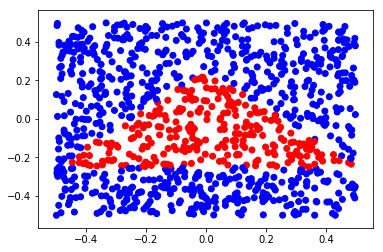

In [11]:
# instance: triangle_test_small_b1_s3
def build_triangle(n=10):  
    X = np.random.rand(n, 2)-0.5
#     X1 = np.random.rand(int(n/2), 2)-0.5
#     X2 = np.random.rand(int(n/2), 2)*0.2-0.1
#     X = np.vstack((X1, X2))
    
    # assume l1, l2, and l3 are the parameters of a line
    # e.g. [theta1, theta2, b]: theta1 x1 + theta2 x2 + b <= 0
    lines = [[1,1,-0.25], [-1, 1, -0.25], [0, -1, -0.25]]
    y = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y = np.logical_and((X.dot([t1, t2]) + b) <= 0, y)
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_triangle(n)
plotData(X, Y)

0.07% (0m 0s) 0.6744


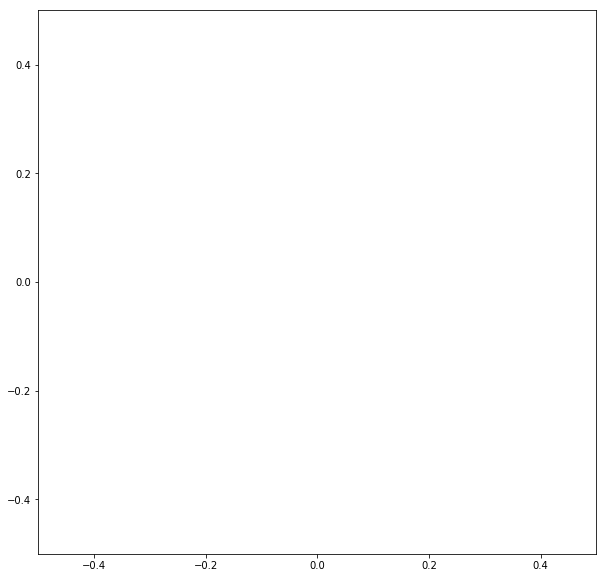

probability of choosing r is 0.0
probability of choosing g is 1.0
probability of choosing b is 0.0
p(y=-1|z="r") is 0.7566666603088379
p(y=-1|z="g") is 0.7615176439285278
p(y=-1|z="b") is 0.6858006119728088


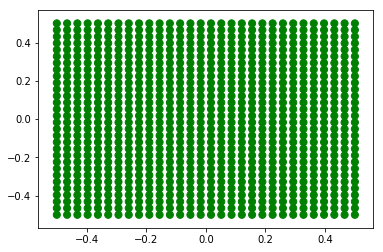

6.73% (0m 10s) 0.5666


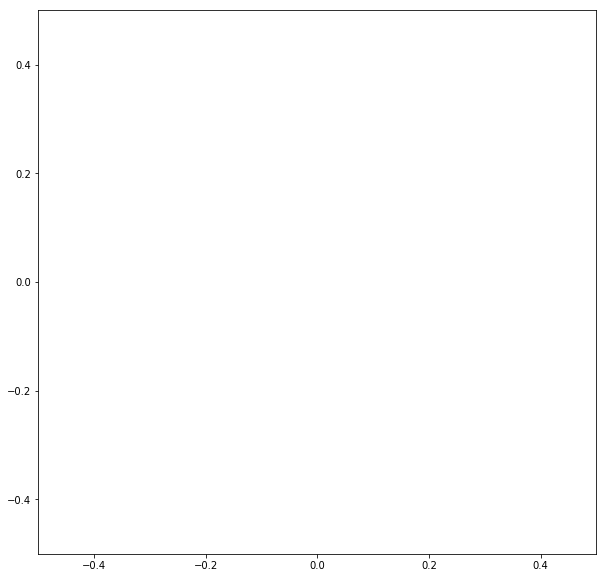

probability of choosing r is 0.36
probability of choosing g is 0.287
probability of choosing b is 0.353
p(y=-1|z="r") is 0.7301587462425232
p(y=-1|z="g") is 0.7439758777618408
p(y=-1|z="b") is 0.7308781743049622


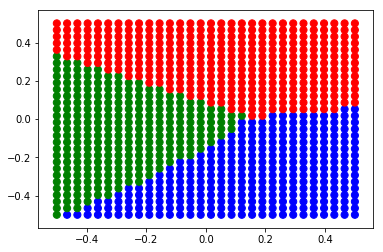

13.40% (0m 20s) 0.5557


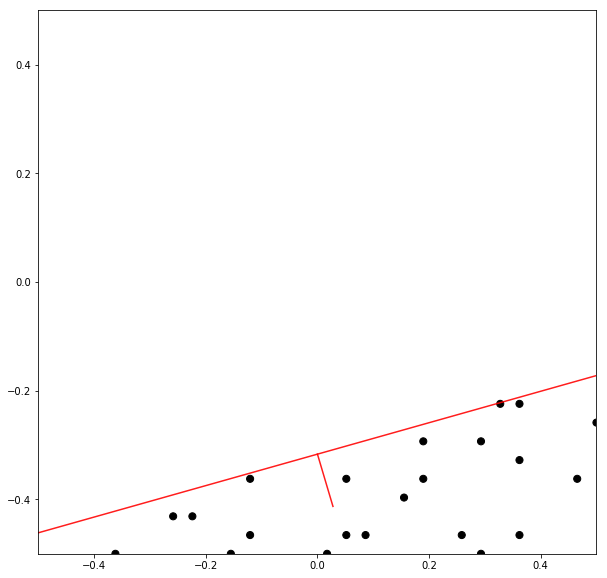

probability of choosing r is 0.409
probability of choosing g is 0.13
probability of choosing b is 0.461
p(y=-1|z="r") is 0.7788779139518738
p(y=-1|z="g") is 0.7095808386802673
p(y=-1|z="b") is 0.7217630743980408


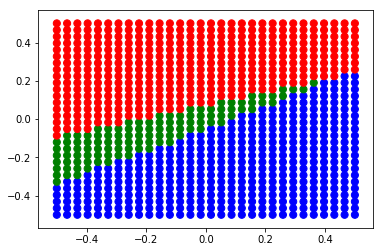

20.07% (0m 30s) 0.4384


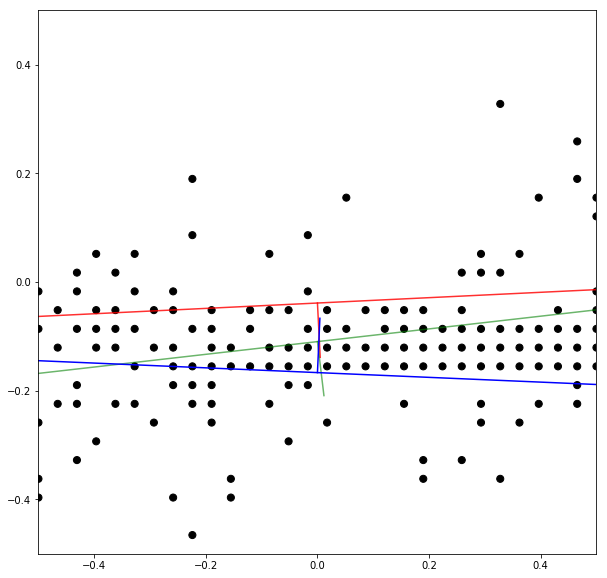

probability of choosing r is 0.339
probability of choosing g is 0.243
probability of choosing b is 0.418
p(y=-1|z="r") is 0.7680251002311707
p(y=-1|z="g") is 0.7147650718688965
p(y=-1|z="b") is 0.7232375741004944


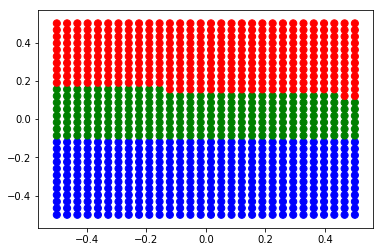

26.73% (0m 40s) 0.3308


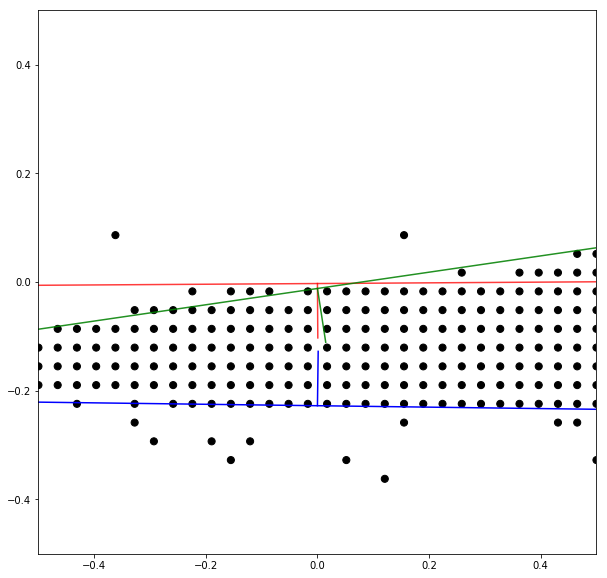

probability of choosing r is 0.291
probability of choosing g is 0.329
probability of choosing b is 0.38
p(y=-1|z="r") is 0.7727272510528564
p(y=-1|z="g") is 0.6805970072746277
p(y=-1|z="b") is 0.7535014152526855


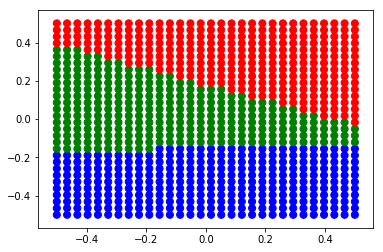

33.40% (0m 49s) 0.2791


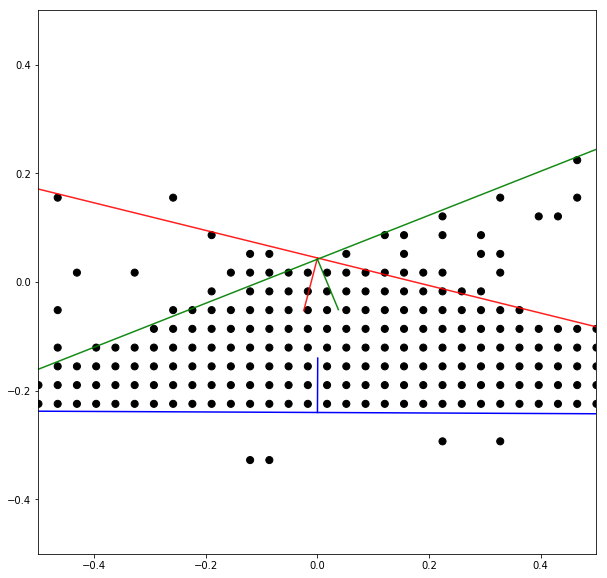

probability of choosing r is 0.314
probability of choosing g is 0.328
probability of choosing b is 0.358
p(y=-1|z="r") is 0.7278106212615967
p(y=-1|z="g") is 0.6791277527809143
p(y=-1|z="b") is 0.7947214245796204


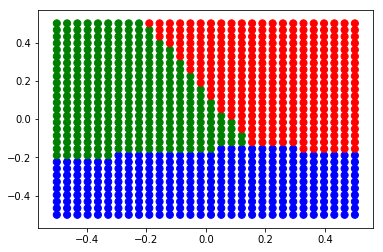

40.07% (0m 58s) 0.1488


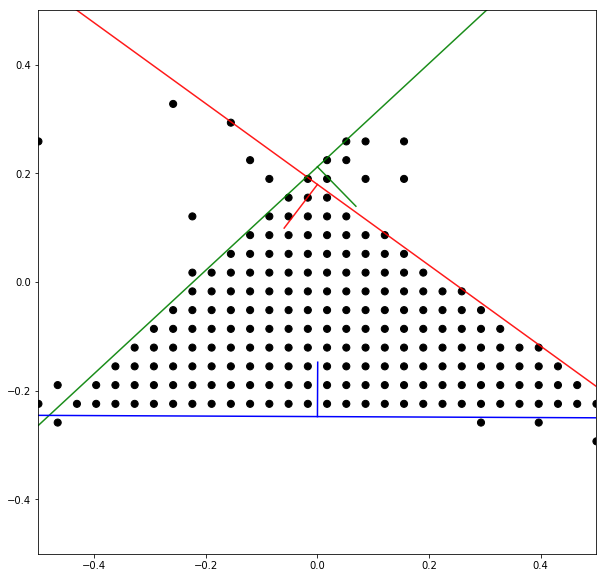

probability of choosing r is 0.322
probability of choosing g is 0.32
probability of choosing b is 0.358
p(y=-1|z="r") is 0.707317054271698
p(y=-1|z="g") is 0.7264437675476074
p(y=-1|z="b") is 0.7696793079376221


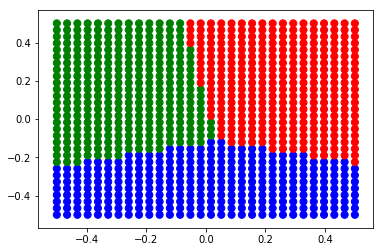

46.73% (1m 8s) 0.1304


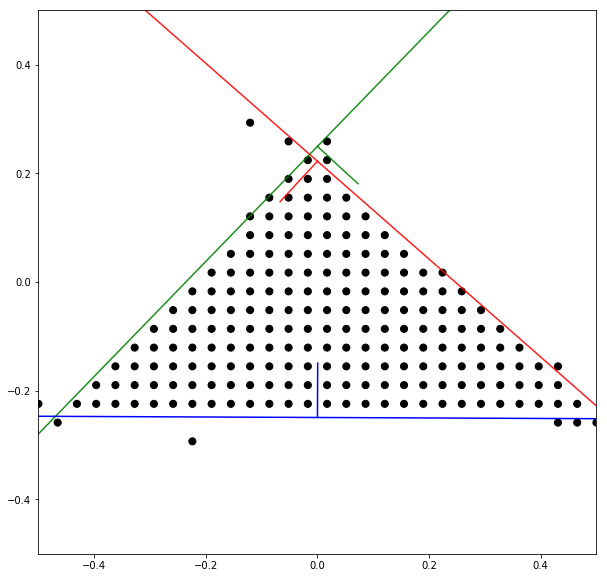

probability of choosing r is 0.319
probability of choosing g is 0.32
probability of choosing b is 0.361
p(y=-1|z="r") is 0.7171052694320679
p(y=-1|z="g") is 0.7552238702774048
p(y=-1|z="b") is 0.7313019633293152


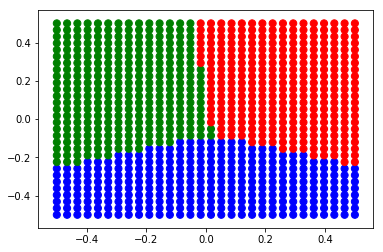

53.40% (1m 18s) 0.0943


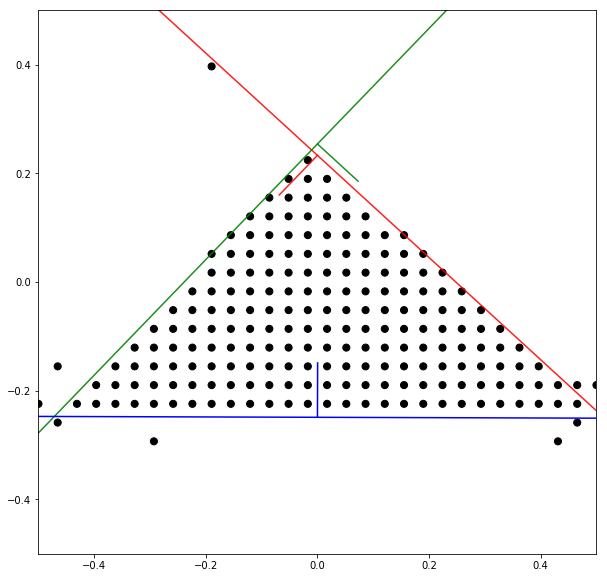

probability of choosing r is 0.317
probability of choosing g is 0.32
probability of choosing b is 0.363
p(y=-1|z="r") is 0.7333333492279053
p(y=-1|z="g") is 0.739130437374115
p(y=-1|z="b") is 0.7327823638916016


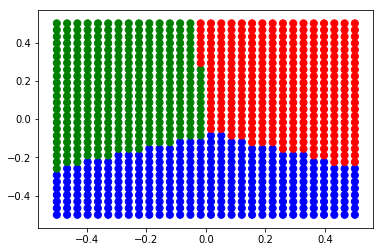

60.07% (1m 28s) 0.1079


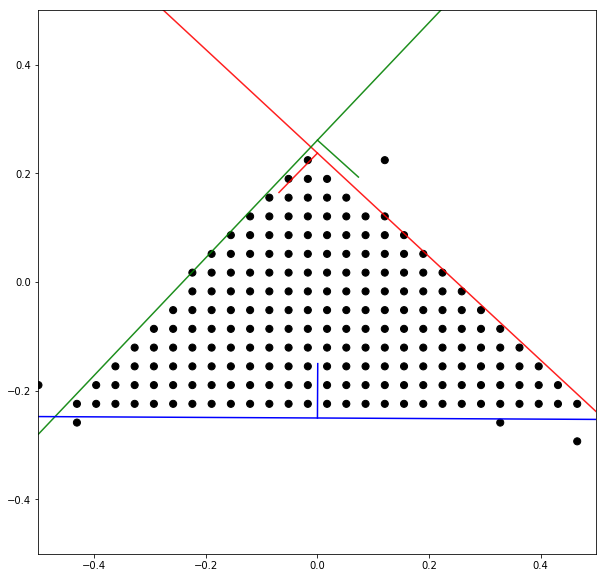

probability of choosing r is 0.317
probability of choosing g is 0.32
probability of choosing b is 0.363
p(y=-1|z="r") is 0.7174603343009949
p(y=-1|z="g") is 0.7303030490875244
p(y=-1|z="b") is 0.7549296021461487


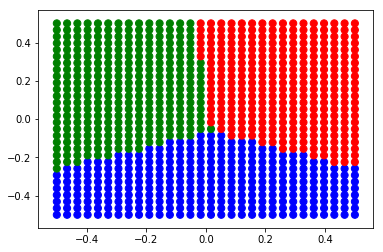

66.73% (1m 38s) 0.0714


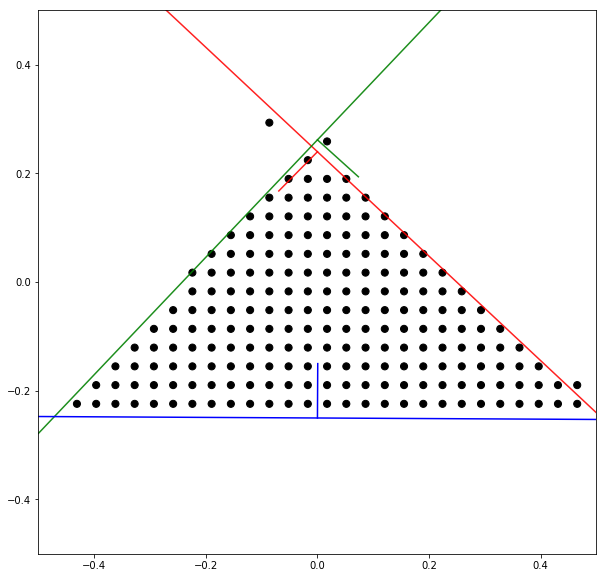

probability of choosing r is 0.316
probability of choosing g is 0.321
probability of choosing b is 0.363
p(y=-1|z="r") is 0.7124999761581421
p(y=-1|z="g") is 0.7461773753166199
p(y=-1|z="b") is 0.7450425028800964


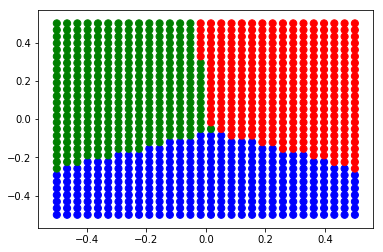

73.40% (1m 48s) 0.0511


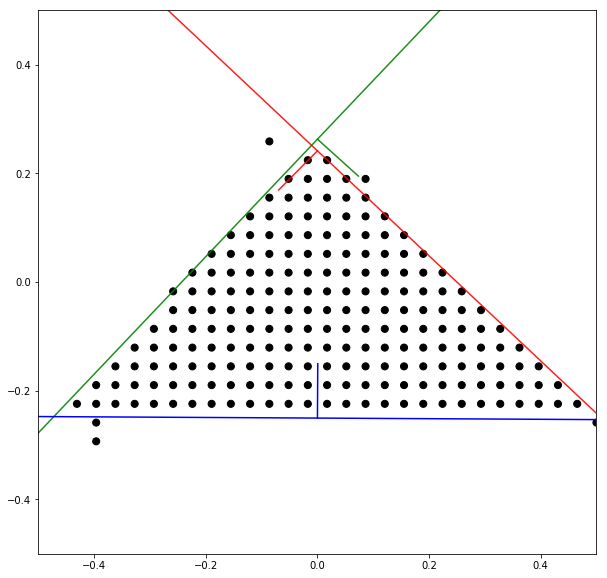

probability of choosing r is 0.316
probability of choosing g is 0.321
probability of choosing b is 0.363
p(y=-1|z="r") is 0.7047619223594666
p(y=-1|z="g") is 0.7599999904632568
p(y=-1|z="b") is 0.7388888597488403


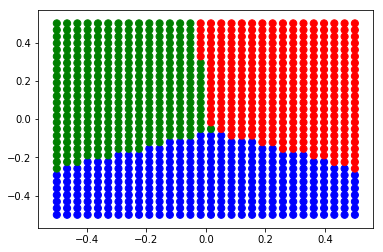

80.07% (1m 58s) 0.0293


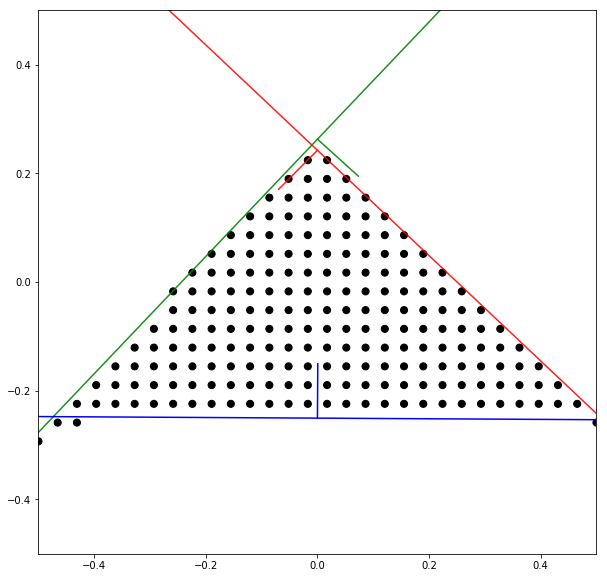

probability of choosing r is 0.316
probability of choosing g is 0.321
probability of choosing b is 0.363
p(y=-1|z="r") is 0.7133956551551819
p(y=-1|z="g") is 0.75
p(y=-1|z="b") is 0.7408450841903687


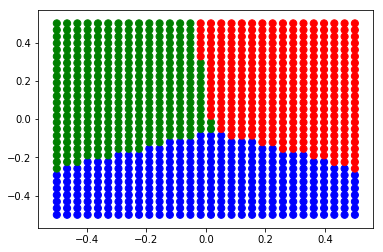

86.73% (2m 8s) 0.0315


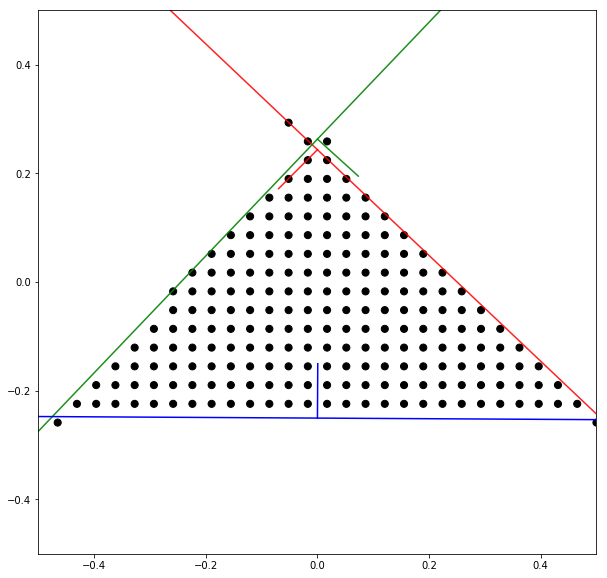

probability of choosing r is 0.315
probability of choosing g is 0.322
probability of choosing b is 0.363
p(y=-1|z="r") is 0.7215189933776855
p(y=-1|z="g") is 0.7370030283927917
p(y=-1|z="b") is 0.7450980544090271


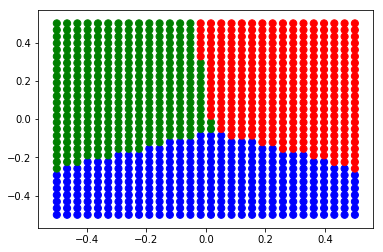

93.40% (2m 17s) 0.0409


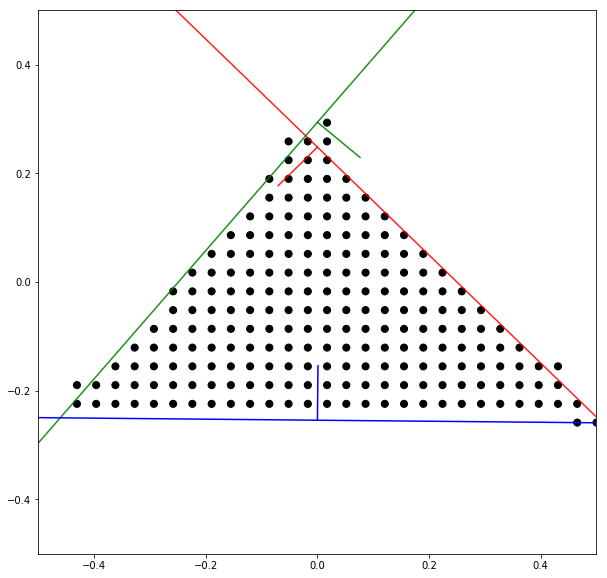

probability of choosing r is 0.316
probability of choosing g is 0.32
probability of choosing b is 0.364
p(y=-1|z="r") is 0.7292993664741516
p(y=-1|z="g") is 0.7431192398071289
p(y=-1|z="b") is 0.7325905561447144


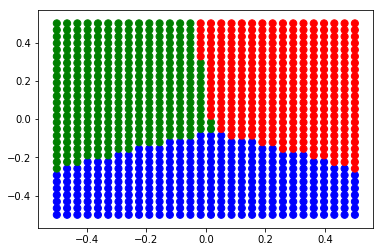

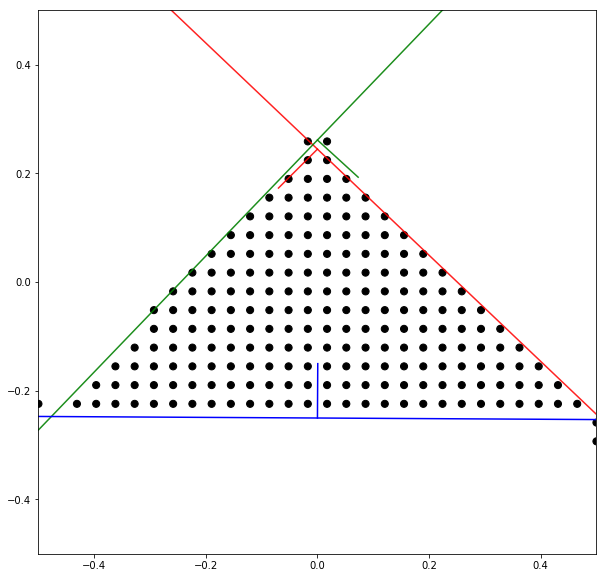

probability of choosing r is 0.315
probability of choosing g is 0.322
probability of choosing b is 0.363
p(y=-1|z="r") is 0.7287581562995911
p(y=-1|z="g") is 0.7402985095977783
p(y=-1|z="b") is 0.7353760600090027


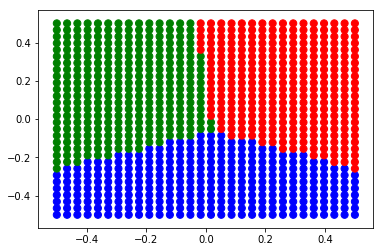

[0.6744340658187866,
 0.566584050655365,
 0.5556511282920837,
 0.43844151496887207,
 0.33076751232147217,
 0.27907589077949524,
 0.14881421625614166,
 0.13039883971214294,
 0.09428388625383377,
 0.10790465772151947,
 0.07142169028520584,
 0.051075130701065063,
 0.029343539848923683,
 0.03149927407503128,
 0.04094970226287842]

In [13]:
input_size = 2 # 2d input
switch_size = 3 # can only output 3 lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

switch = Switch(input_size, switch_size)
weight = Weight(switch_size, input_size+1) # +1 for b in linear model

max_grad = 40
alpha = -0.5 #-0.5 -0.2 also works
beta = -alpha # 0.7
log_name = 'shapes/triangle' + '_a' + str(alpha) + '_b' + str(beta) + '_s' + str(switch_size)
silence = False
lr = 0.001
t =  InterpretableTrainer(switch, weight, apply_linear, alpha=alpha, beta=beta,
                          log_name=log_name, max_grad=max_grad, silence=silence, lr=lr,
                          max_time=5, print_every=100)

# fit a model here:
train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=n, shuffle=True)

t.fit(data, n_epochs=1500)

In [7]:
input_size = 2 # 2d input
switch_size = 3 # can only output 3 lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

max_grad = 0.1
for beta in [0.5, 0.1, 0, 1]:
    alpha = -beta
    switch = Switch(input_size, switch_size)
    weight = Weight(switch_size, input_size+1) # +1 for b in linear model

    log_name = 'shapes/triangle_test_small' + '_b' + str(beta) + '_s' + str(switch_size)
    silence = True
    t =  InterpretableTrainer(switch, weight, apply_linear, alpha=alpha, beta=beta,
                              log_name=log_name, max_grad=max_grad, silence=silence)

    # fit a model here:
    train_data = TensorDataset(x.data, y.data)
    data = DataLoader(train_data, batch_size=n, shuffle=True)

    t.fit(data, n_epochs=1500, print_every=100)

0.07% (0m 0s) 0.7388
6.73% (0m 10s) 0.5502
13.40% (0m 19s) 0.5466
20.07% (0m 29s) 0.4999
26.73% (0m 38s) 0.4126
33.40% (0m 48s) 0.3590
40.07% (0m 58s) 0.3304
46.73% (1m 7s) 0.2499
53.40% (1m 17s) 0.1240
60.07% (1m 28s) 0.0808
66.73% (1m 37s) 0.0549
73.40% (1m 47s) 0.0891
80.07% (1m 57s) 0.0538
86.73% (2m 6s) 0.0767
93.40% (2m 16s) 0.0245
0.07% (0m 0s) 0.6773
6.73% (0m 10s) 0.5495
13.40% (0m 19s) 0.5023
20.07% (0m 29s) 0.3725
26.73% (0m 38s) 0.3420
33.40% (0m 48s) 0.3111
40.07% (0m 58s) 0.3007
46.73% (1m 7s) 0.3116
53.40% (1m 17s) 0.3031
60.07% (1m 27s) 0.2989
66.73% (1m 36s) 0.2957
73.40% (1m 48s) 0.2880
80.07% (1m 57s) 0.2898
86.73% (2m 7s) 0.2880
93.40% (2m 17s) 0.2999
0.07% (0m 0s) 0.6712
6.73% (0m 9s) 0.5498
13.40% (0m 19s) 0.5190
20.07% (0m 29s) 0.3732
26.73% (0m 38s) 0.3221
33.40% (0m 48s) 0.2923
40.07% (0m 57s) 0.2843
46.73% (1m 9s) 0.2721
53.40% (1m 19s) 0.2569
60.07% (1m 28s) 0.2399
66.73% (1m 38s) 0.2321
73.40% (1m 47s) 0.2255
80.07% (1m 58s) 0.2078
86.73% (2m 8s) 0.1672
93.4

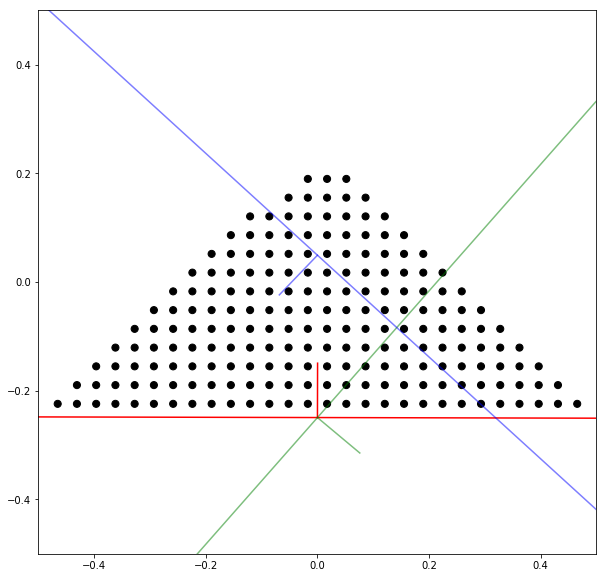

probability of choosing r is 0.497
probability of choosing g is 0.251
probability of choosing b is 0.252
p(y=-1|z="r") is 0.5201612710952759
p(y=-1|z="g") is 1.0
p(y=-1|z="b") is 0.9880478382110596


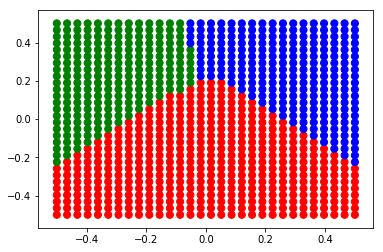

In [18]:
t.plot(to_var(x.data), to_var(y.data), inrange=True)

## rectangle world

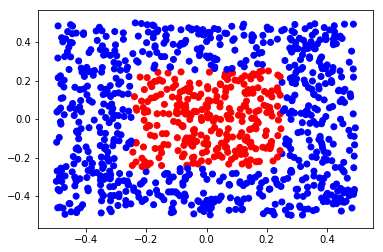

In [15]:
# instance: square_b0.5_s4
def build_square(n=10):  
    X = np.random.rand(n, 2)-0.5
#     X1 = np.random.rand(int(n/2), 2)-0.5
#     X2 = np.random.rand(int(n/2), 2)*0.2-0.1
#     X = np.vstack((X1, X2))
    
    # assume l1, l2, and l3 are the parameters of a line
    # e.g. [theta1, theta2, b]: theta1 x1 + theta2 x2 + b <= 0
    lines = [[-1,0,-0.25], [1, 0, -0.25], [0, -1, -0.25], [0, 1, -0.25]]
    y = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y = np.logical_and((X.dot([t1, t2]) + b) <= 0, y)
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_square(n)
plotData(X, Y)

0.10% (0m 0s) 0.6748


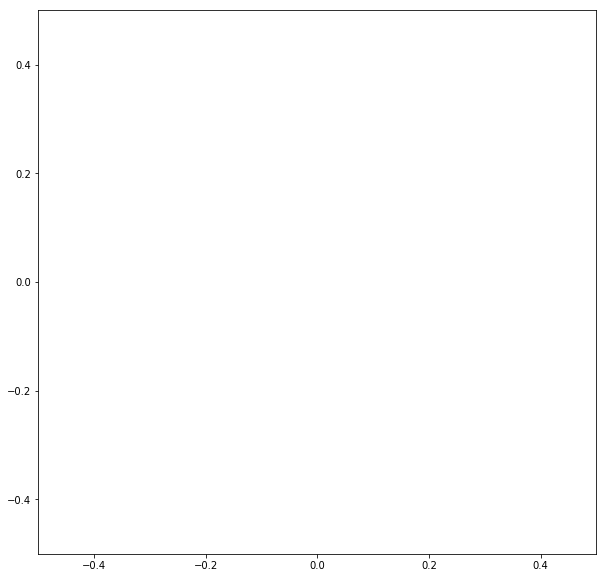

probability of choosing r is 0.0
probability of choosing g is 0.27
probability of choosing b is 0.0
probability of choosing orange is 0.73
p(y=-1|z="r") is 0.7237353920936584
p(y=-1|z="g") is 0.7080000042915344
p(y=-1|z="b") is 0.6807511448860168
p(y=-1|z="orange") is 0.7285714149475098


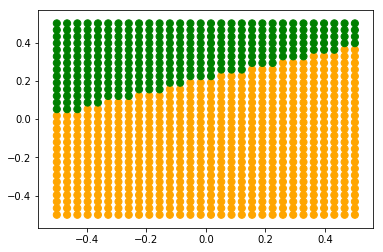

10.10% (0m 10s) 0.5997


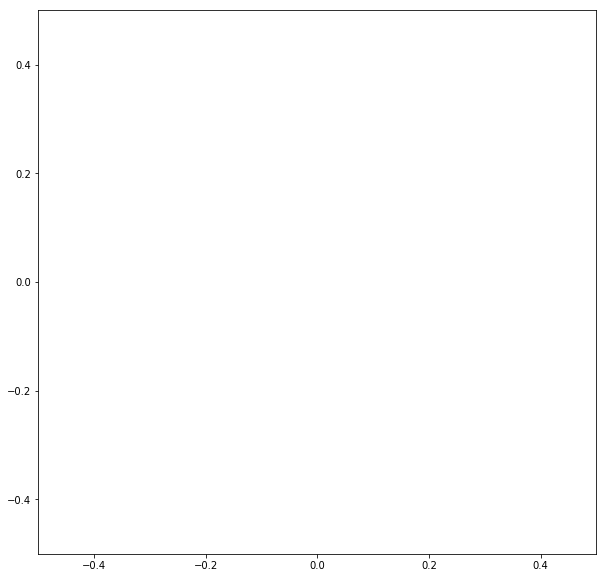

probability of choosing r is 0.095
probability of choosing g is 0.444
probability of choosing b is 0.173
probability of choosing orange is 0.288
p(y=-1|z="r") is 0.6913043260574341
p(y=-1|z="g") is 0.6880000233650208
p(y=-1|z="b") is 0.7490347623825073
p(y=-1|z="orange") is 0.7164750695228577


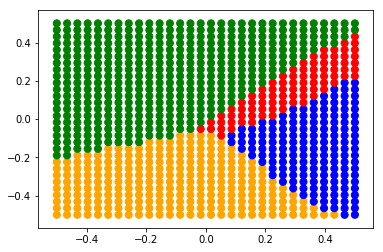

20.10% (0m 21s) 0.5852


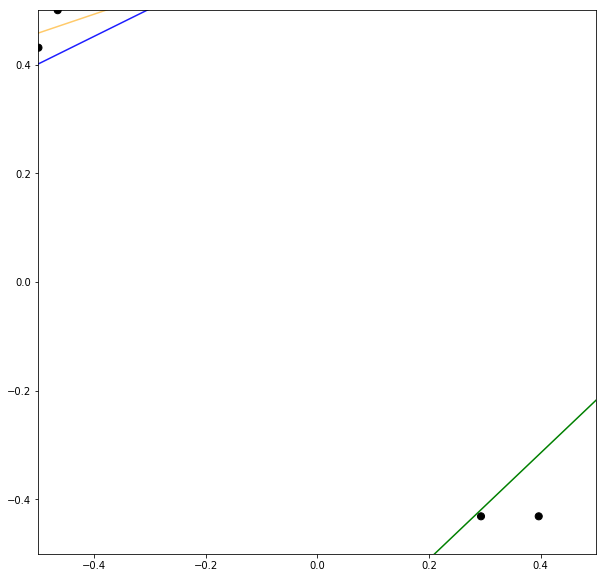

probability of choosing r is 0.08
probability of choosing g is 0.373
probability of choosing b is 0.329
probability of choosing orange is 0.218
p(y=-1|z="r") is 0.7445887327194214
p(y=-1|z="g") is 0.7165354490280151
p(y=-1|z="b") is 0.698924720287323
p(y=-1|z="orange") is 0.6906779408454895


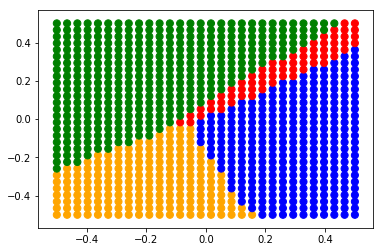

30.10% (0m 31s) 0.4926


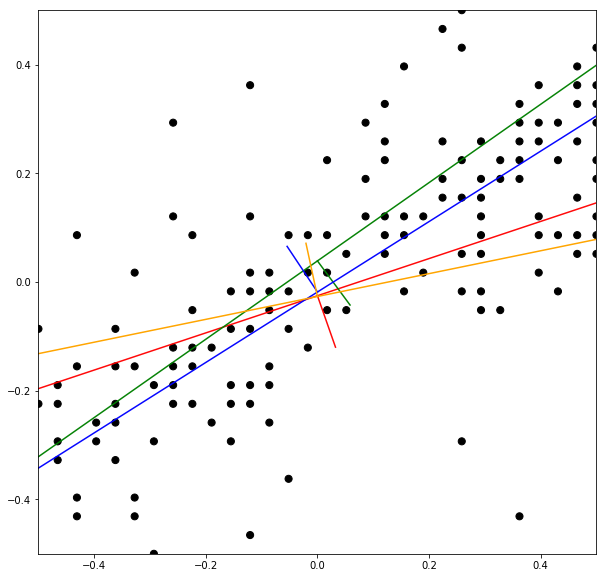

probability of choosing r is 0.246
probability of choosing g is 0.249
probability of choosing b is 0.249
probability of choosing orange is 0.256
p(y=-1|z="r") is 0.6879699230194092
p(y=-1|z="g") is 0.7606837749481201
p(y=-1|z="b") is 0.72265625
p(y=-1|z="orange") is 0.6803278923034668


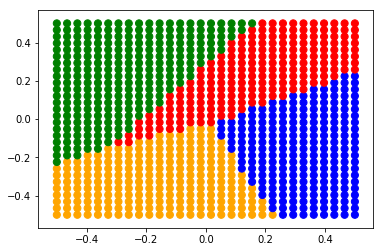

40.10% (0m 42s) 0.3567


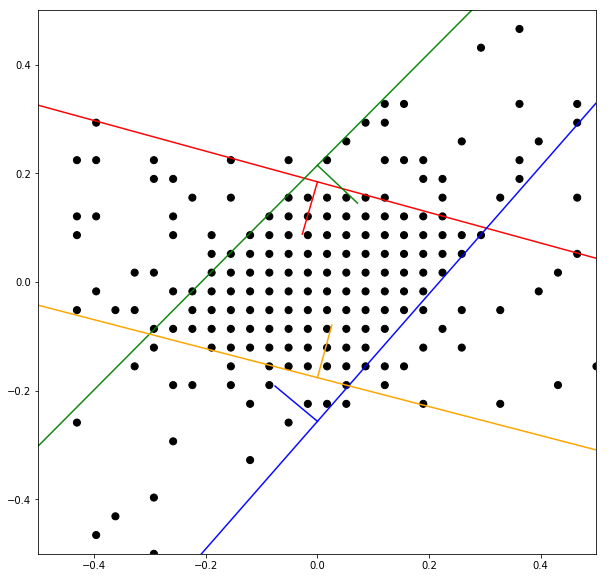

probability of choosing r is 0.254
probability of choosing g is 0.241
probability of choosing b is 0.247
probability of choosing orange is 0.258
p(y=-1|z="r") is 0.6857143044471741
p(y=-1|z="g") is 0.7208333611488342
p(y=-1|z="b") is 0.7076923251152039
p(y=-1|z="orange") is 0.7333333492279053


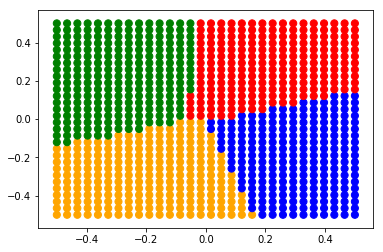

50.10% (0m 52s) 0.2167


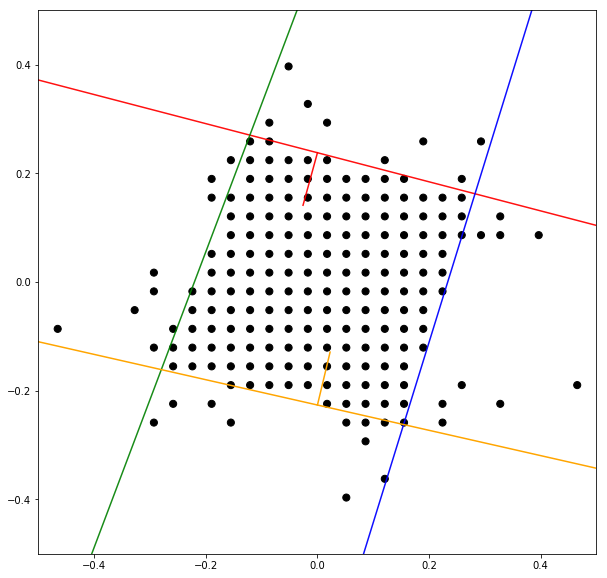

probability of choosing r is 0.247
probability of choosing g is 0.239
probability of choosing b is 0.249
probability of choosing orange is 0.265
p(y=-1|z="r") is 0.7078189253807068
p(y=-1|z="g") is 0.7250996232032776
p(y=-1|z="b") is 0.680497944355011
p(y=-1|z="orange") is 0.7320754528045654


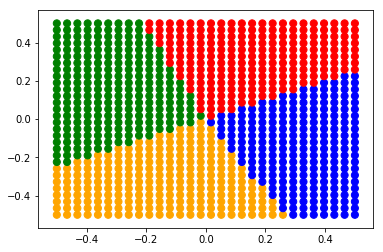

60.10% (1m 3s) 0.1350


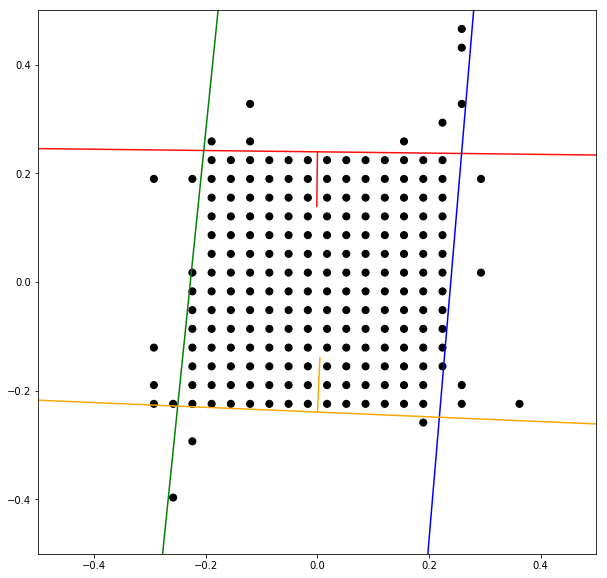

probability of choosing r is 0.24
probability of choosing g is 0.253
probability of choosing b is 0.255
probability of choosing orange is 0.252
p(y=-1|z="r") is 0.6932271122932434
p(y=-1|z="g") is 0.7137096524238586
p(y=-1|z="b") is 0.694779098033905
p(y=-1|z="orange") is 0.7460317611694336


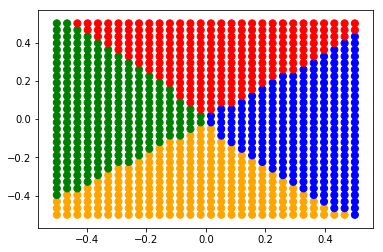

70.10% (1m 14s) 0.1110


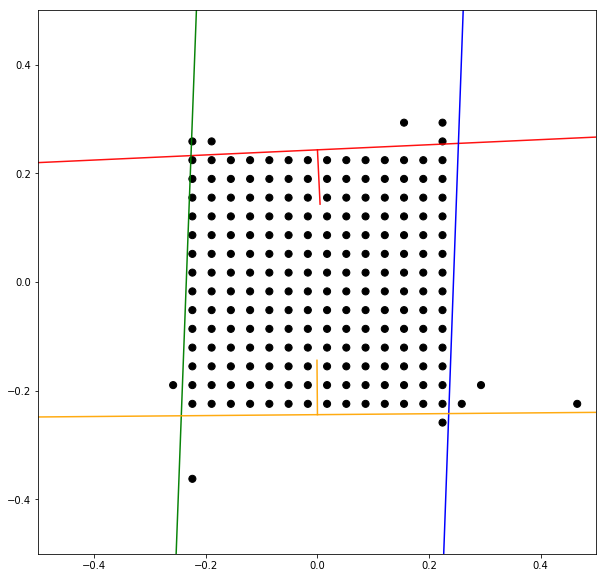

probability of choosing r is 0.243
probability of choosing g is 0.252
probability of choosing b is 0.261
probability of choosing orange is 0.244
p(y=-1|z="r") is 0.7074235677719116
p(y=-1|z="g") is 0.7449392676353455
p(y=-1|z="b") is 0.6891385912895203
p(y=-1|z="orange") is 0.7081711888313293


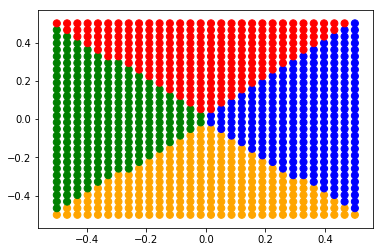

80.10% (1m 25s) 0.1050


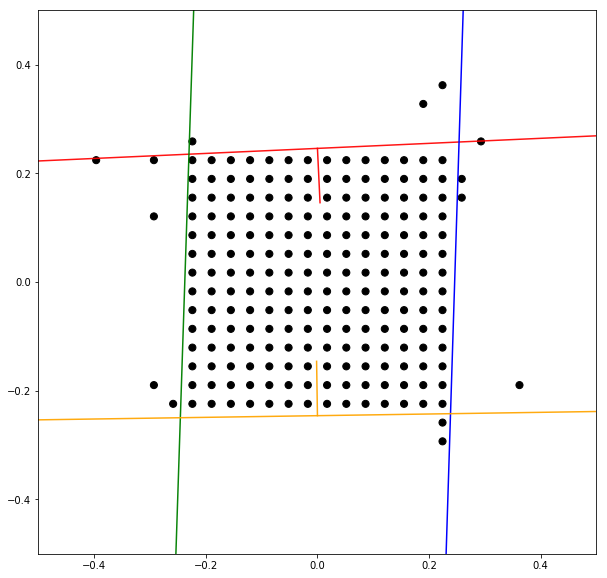

probability of choosing r is 0.24
probability of choosing g is 0.252
probability of choosing b is 0.262
probability of choosing orange is 0.246
p(y=-1|z="r") is 0.6926407217979431
p(y=-1|z="g") is 0.7459016442298889
p(y=-1|z="b") is 0.6703703999519348
p(y=-1|z="orange") is 0.7411764860153198


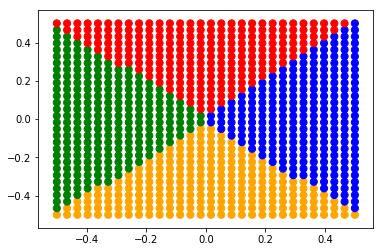

90.10% (1m 35s) 0.0594


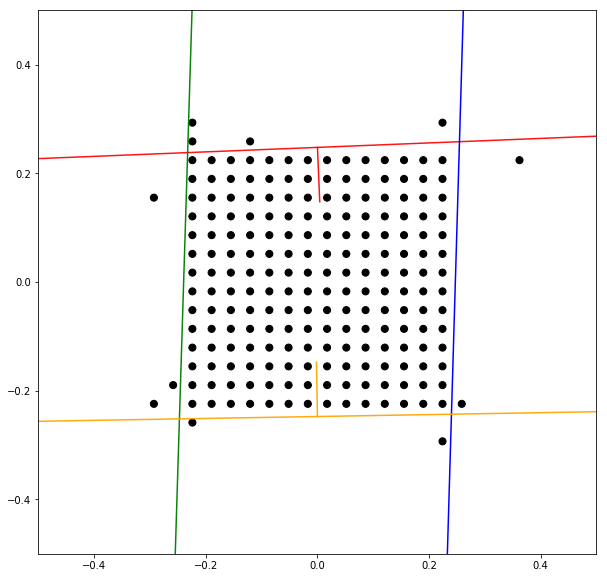

probability of choosing r is 0.24
probability of choosing g is 0.252
probability of choosing b is 0.262
probability of choosing orange is 0.246
p(y=-1|z="r") is 0.6877636909484863
p(y=-1|z="g") is 0.7540983557701111
p(y=-1|z="b") is 0.6877323389053345
p(y=-1|z="orange") is 0.7200000286102295


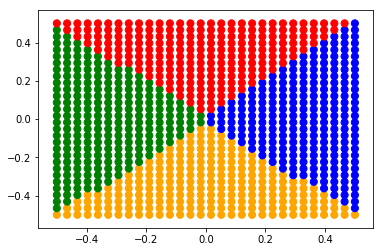

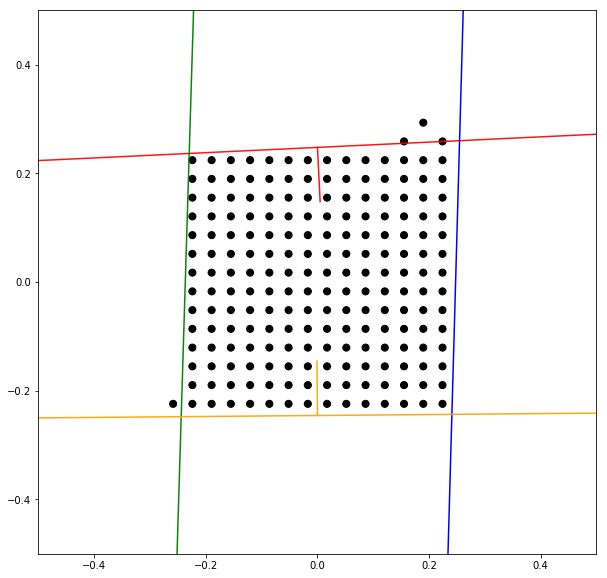

probability of choosing r is 0.24
probability of choosing g is 0.252
probability of choosing b is 0.262
probability of choosing orange is 0.246
p(y=-1|z="r") is 0.675000011920929
p(y=-1|z="g") is 0.7469879388809204
p(y=-1|z="b") is 0.6870229244232178
p(y=-1|z="orange") is 0.7389557957649231


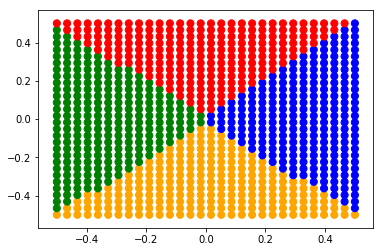

[0.6747788786888123,
 0.5996524691581726,
 0.5851693153381348,
 0.4925938546657562,
 0.3566604256629944,
 0.2166784107685089,
 0.13499021530151367,
 0.11102131754159927,
 0.10502628982067108,
 0.059352755546569824]

In [17]:
input_size = 2 # 2d input
switch_size = 4 # can only output 4 lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

switch = Switch(input_size, switch_size)
weight = Weight(switch_size, input_size+1) # +1 for b in linear model

max_grad = 0.1
alpha = -0.5 # -0.5
beta = -alpha # 0.7
log_name = 'shapes/square' + '_b' + str(beta) + '_s' + str(switch_size)
silence = False
t =  InterpretableTrainer(switch, weight, apply_linear, alpha=alpha, beta=beta,
                          log_name=log_name, max_grad=max_grad, silence=silence, print_every=100)

# fit a model here:
train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=n, shuffle=True)

t.fit(data, n_epochs=1000)

## 2 rectangle world

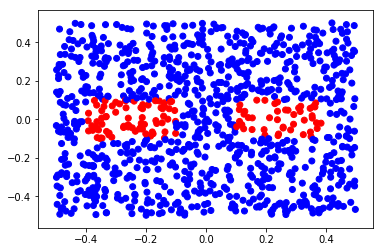

In [21]:
def build_square2(n=10):  
    X = np.random.rand(n, 2)-0.5
#     X1 = np.random.rand(int(n/2), 2)-0.5
#     X2 = np.random.rand(int(n/2), 2)*0.2-0.1
#     X = np.vstack((X1, X2))
    
    # assume l1, l2, and l3 are the parameters of a line
    # e.g. [theta1, theta2, b]: theta1 x1 + theta2 x2 + b <= 0
    lines = [[-1,0,-0.4], [1, 0, 0.1], [0, -1, -0.1], [0, 1, -0.1]]
    y = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y = np.logical_and((X.dot([t1, t2]) + b) <= 0, y)
     
    lines = [[-1,0,0.1], [1, 0, -0.4], [0, -1, -0.1], [0, 1, -0.1]]
    y2 = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y2 = np.logical_and((X.dot([t1, t2]) + b) <= 0, y2)
    
    y = np.logical_or(y, y2)
    
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_square2(n)
plotData(X, Y)

In [17]:
input_size = 2 # 2d input
switch_size = 8 # can only output 8 lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

max_grad = 40
for beta in [0.5]:#[0.01,0.1,0.5,1]:
    alpha = -beta
    
    switch = Switch(input_size, switch_size)
    weight = Weight(switch_size, input_size+1) # +1 for b in linear model
    
    log_name = 'shapes/square2_' + '_b' + str(beta) + '_s' + str(switch_size)
    silence = True
    t =  InterpretableTrainer(switch, weight, apply_linear, alpha=alpha, beta=beta,
                              log_name=log_name, max_grad=max_grad, silence=silence)

    # fit a model here:
    train_data = TensorDataset(x.data, y.data)
    data = DataLoader(train_data, batch_size=n, shuffle=True)

    t.fit(data, n_epochs=10000, print_every=100)

0.01% (0m 0s) 0.7242
1.01% (0m 17s) 0.3568
2.01% (0m 34s) 0.3568
3.01% (0m 51s) 0.3570
4.01% (1m 8s) 0.3567
5.01% (1m 25s) 0.3569
6.01% (1m 42s) 0.3570
7.01% (2m 0s) 0.3564
8.01% (2m 18s) 0.3562
9.01% (2m 35s) 0.3535
10.01% (2m 53s) 0.2880
11.01% (3m 10s) 0.2170
12.01% (3m 27s) 0.1869
13.01% (3m 44s) 0.1718
14.01% (4m 1s) 0.1774
15.01% (4m 19s) 0.1695
16.01% (4m 36s) 0.1688
17.01% (4m 53s) 0.1794
18.01% (5m 10s) 0.1647
19.01% (5m 27s) 0.1659
20.01% (5m 44s) 0.1653
21.01% (6m 1s) 0.1615
22.01% (6m 18s) 0.1630
23.01% (6m 35s) 0.1580
24.01% (6m 52s) 0.1692
25.01% (7m 9s) 0.1610
26.01% (7m 22s) 0.1630
27.01% (7m 34s) 0.1577
28.01% (7m 52s) 0.1570
29.01% (8m 9s) 0.1600
30.01% (8m 26s) 0.1604
31.01% (8m 44s) 0.1525
32.01% (9m 0s) 0.1584
33.01% (9m 18s) 0.1561
34.01% (9m 36s) 0.1572
35.01% (9m 53s) 0.1594
36.01% (10m 10s) 0.1591
37.01% (10m 27s) 0.1570
38.01% (10m 44s) 0.1499
39.01% (11m 1s) 0.1526
40.01% (11m 19s) 0.1515
41.01% (11m 36s) 0.1596
42.01% (11m 54s) 0.1559
43.01% (12m 11s) 0.1598

## egg world

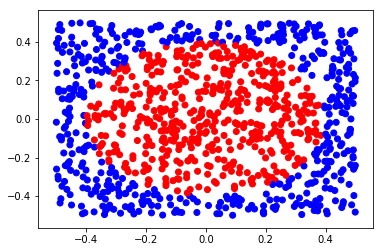

In [18]:
def build_circle(n=10):  
    X = np.random.rand(n, 2)-0.5
    y = (X[:,0]**2 + X[:, 1]**2 <= 0.16)
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_circle(n)
plotData(X, Y)

In [19]:
input_size = 2 # 2d input
switch_size = 10 # can only output switch_size lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

switch = Switch(input_size, switch_size)
weight = Weight(switch_size, input_size+1) # +1 for b in linear model

t =  InterpretableTrainer(switch, weight, apply_linear, alpha=-0.5, beta=0.5,
                         log_name='shapes/circle_b0.5', silence=True, print_every=100)

# fit a model here:
train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=1000, shuffle=True)
t.fit(data, n_epochs=1500)

0.07% (0m 0s) 0.6931
6.73% (0m 14s) 0.6795
13.40% (0m 30s) 0.5831
20.07% (0m 45s) 0.4164
26.73% (1m 0s) 0.3241
33.40% (1m 15s) 0.2401
40.07% (1m 30s) 0.1770
46.73% (1m 46s) 0.1454
53.40% (2m 0s) 0.1171
60.07% (2m 15s) 0.1139
66.73% (2m 31s) 0.0991
73.40% (2m 47s) 0.0928
80.07% (3m 3s) 0.0883
86.73% (3m 18s) 0.0711
93.40% (3m 34s) 0.0815


[0.6931065320968628,
 0.6795035004615784,
 0.5831213593482971,
 0.41644787788391113,
 0.3241116404533386,
 0.24013477563858032,
 0.17703238129615784,
 0.1453675776720047,
 0.11708278208971024,
 0.113948754966259,
 0.09909626841545105,
 0.09275836497545242,
 0.08831830322742462,
 0.07114242017269135,
 0.08151666074991226]

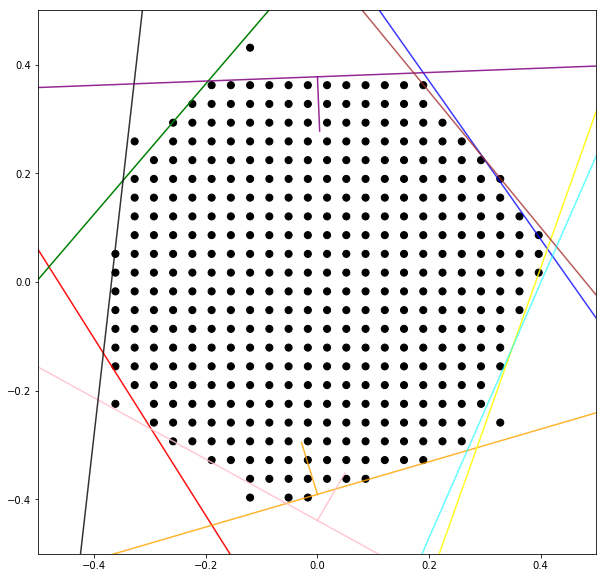

probability of choosing r is 0.113
probability of choosing g is 0.121
probability of choosing b is 0.094
probability of choosing orange is 0.099
probability of choosing pink is 0.103
probability of choosing k is 0.097
probability of choosing purple is 0.102
probability of choosing yellow is 0.105
probability of choosing brown is 0.093
probability of choosing cyan is 0.073
p(y=-1|z="r") is 0.585106372833252
p(y=-1|z="g") is 0.6818181872367859
p(y=-1|z="b") is 0.5232558250427246
p(y=-1|z="orange") is 0.6274510025978088
p(y=-1|z="pink") is 0.5546218752861023
p(y=-1|z="k") is 0.49038460850715637
p(y=-1|z="purple") is 0.4356435537338257
p(y=-1|z="yellow") is 0.6458333134651184
p(y=-1|z="brown") is 0.5043478012084961
p(y=-1|z="cyan") is 0.09589041024446487


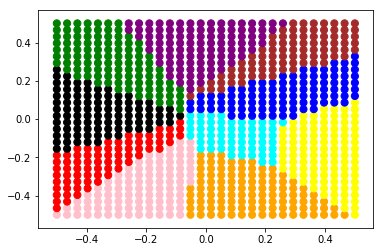

In [11]:
t.plot(to_var(x.data), to_var(y.data), inrange=True)

# View cluster as a multi-task learning problem

If we view each cluster as a different task, this becomes a multi-task learning problem in which we find the subtask we want to separate. If tasks $T=\{t_i\}_{i=1}^{|T|}$ are given, the switch network can just take task number $t$ as input.

My method is different from previous works in that:
1. cluster assignment and classifiers are jointly learned
2. task similarities are not forced but to optimize a very natural objective (related tasks share the same cluster and thus the same classifier)
3. multiple level of regularization are enforced (low cluster number, shared weight generation network)

Given previous works, we already have 2 generalization bound (Learning Multiple Tasks using Shared Hypotheses (Crammer and Mansour, 2012), Clustered Support Vector Machines (Gu and Han, 2013)). I should be able to improve on their bound because my model is jointly learned.

A more modern comparison is to Adaptive Smoothed Online Multi-Task Learning (Murugesan et. al, 2016). They learn a task similarity matrix through weighting loss function of each task by their similarity to other tasks and adding a prior of high entropy to bias sharing. My work differs by a) using a more natural objective function and b) sharing is not forced but learned (assuming the weight network has enough capacity and |z| is as large as number of tasks |T|).

Here, we show result on synthetic data for (Crammer, 2012) and real data in (Murugesan et. al, 2016).

I shoud do an ablation study to study the effect of joint training

1. switch network is 
   1. kmeans clustering
   2. spectral clustering
   3. autoencoder + spectral clustering
   4. stochastically trained
   5. random assignment (iterate in weight network)
2. weight network is 
   1. k independent classifiers
   2. shared classifier through regularizing a master network
   
connection to existing works:

1(a) + 2(a) = cluster SVM

1(e) + 2(a) = shared k hypothesis

thus we have 10 baselines to juggle with

In this work, we want to answer the following question

1. does joint clustering better than other hard clustering techniques?
2. how to most efficiently add in task number as a helper information?

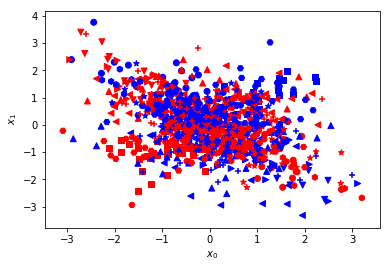

In [3]:
# instance: mtl_standard-0.05_ntask200_nswitch5_mtlTrue
def genTask(n=100):
    d = 20
    C = np.eye(d)
    cov = np.random.rand() * 2 - 1
    st = 1 if (np.random.rand()-0.5 > 0) else -1
    C[0,1] = C[1,0] = cov
    while True:
        X = genCovX(C, n)
        y = ((X[:,1] * st) >= 0).astype(np.int)
        if sum(y) > 0 and sum(y) < n: # has both positive and negative examples
            break
    return X, y*2-1, st

markers = [',','o','^','v','<','>','*','h','H','+']

for m in markers:
    X, y, st = genTask()
    colors = list(map(lambda a: 'b' if a==-1 else 'r', y))
    plt.scatter(X[:,0], X[:,1], c=colors, marker=m)
    
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.show()

In [4]:
ntasks = 200
train_n = 6
test_n = 1000
total_data = [genTask(n=train_n + test_n) for i in range(ntasks)]

# pos and neg tasks
pos_tasks = list(filter(lambda x: x[2] > 0, total_data))
neg_tasks = list(filter(lambda x: x[2] < 0, total_data))
print(len(pos_tasks), 'positive tasks')
total_data = list(enumerate(pos_tasks + neg_tasks))
print('total', len(total_data), 'tasks')

X = np.vstack(list(map(lambda x: np.hstack([x[1][0][:train_n], 
                                            x[0]*np.ones_like(x[1][0][:,:1])[:train_n]]), 
                        total_data)))
Y = np.hstack(list(map(lambda x: x[1][1][:train_n], 
                       total_data)))

Xtest = np.vstack(list(map(lambda x: np.hstack([x[1][0][train_n:], 
                                                x[0]*np.ones_like(x[1][0][:,:1])[train_n:]]), 
                           total_data)))
Ytest = np.hstack(list(map(lambda x: x[1][1][train_n:], 
                           total_data)))

87 positive tasks
total 200 tasks


In [5]:
print(X.shape, Y.shape)

(1200, 21) (1200,)


In [29]:
def apply_linear_mtl(f, x):
    return apply_linear(f, x[:,:-1])

mtl = True

switch_size = 5
if mtl:
    input_size = 20
    task_size = ntasks # one hot representation
    apply_f = apply_linear_mtl
else:
    input_size = 21
    task_size = input_size
    apply_f = apply_linear


switch = Switch(task_size, switch_size, mtl=mtl)
weight = Weight(switch_size, input_size+1) # +1 for b in linear model

alpha = -0.05
beta = -alpha
name = 'mtl/'+str(alpha)+'_ntask' + str(ntasks) + '_nswitch' + str(switch_size) + '_mtl' + str(mtl)
t =  InterpretableTrainer(switch, weight, apply_f, alpha=alpha, beta=beta,
                         log_name=name, silence=True, mtl=mtl, print_every=100)

# fit a model here:
batch_size = 1000
x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=batch_size, shuffle=True)

xtest = to_var(torch.from_numpy(Xtest)).float()
ytest = to_var(torch.from_numpy(Ytest)).float()

test_data = TensorDataset(xtest.data, ytest.data)
test_data = DataLoader(test_data, batch_size=batch_size, shuffle=True)

t.fit(data, n_epochs=600, valdata=test_data)

0.14% (0m 0s) 0.7133
8.47% (0m 17s) 0.5525
16.81% (0m 35s) 0.1616
25.14% (0m 52s) 0.0108
33.47% (1m 10s) 0.0052
41.81% (1m 27s) 0.0014
50.14% (1m 44s) 0.0010
58.47% (2m 1s) 0.0005
66.81% (2m 16s) 0.0003
75.14% (2m 31s) 0.0001
83.47% (2m 51s) 0.0001
91.81% (3m 9s) 0.0001


[0.7132666110992432,
 0.5524921417236328,
 0.16162613034248352,
 0.0108479680493474,
 0.005245870444923639,
 0.0014396412298083305,
 0.0010123364627361298,
 0.0005042109405621886,
 0.00029052916215732694,
 0.00014692216063849628,
 0.00011235432612011209,
 8.683895430294797e-05]

# sweep parameters

In [7]:
def apply_linear_mtl(f, x):
    return apply_linear(f, x[:,:-1])

def task1(lr, alpha, beta, k, batch_size):
    mtl = True
    max_time = 5 # at most max_time minutes
    
    switch_size = k
    if mtl:
        input_size = 20
        task_size = ntasks # one hot representation
        apply_f = apply_linear_mtl
    else:
        input_size = 21
        task_size = input_size
        apply_f = apply_linear

    switch = Switch(task_size, switch_size, mtl=mtl)
    weight = Weight(switch_size, input_size+1) # +1 for b in linear model

    name = 'mtl/lr%.3f/a%.3f/b%.3f/k%d/bs%d' % (lr, alpha, beta, k, batch_size)
    os.system('mkdir -p %s' % ("nonlinear_models/" + name))
    t =  InterpretableTrainer(switch, weight, apply_f, alpha=alpha, beta=beta,
                              log_name=name, silence=True, mtl=mtl, 
                              lr=lr, max_time=max_time)

    # fit a model here:
    x = to_var(torch.from_numpy(X)).float()
    y = to_var(torch.from_numpy(Y)).float()

    train_data = TensorDataset(x.data, y.data)
    data = DataLoader(train_data, batch_size=batch_size, shuffle=True)

    xtest = to_var(torch.from_numpy(Xtest)).float()
    ytest = to_var(torch.from_numpy(Ytest)).float()

    test_data = TensorDataset(xtest.data, ytest.data)
    test_data = DataLoader(test_data, batch_size=batch_size, shuffle=True)

    t.fit(data, n_epochs=600, print_every=100, valdata=test_data)

In [ ]:
# train_n, lr, alpha, beta, K, batch_size 
lrs = [0.1, 0.01, 0.001]
alphas = [0.01, -0.1, -0.01]
betas = [0.01, -0.1, -0.01]
Ks = [2, 6, 10, 14]
batch_sizes = [128, 512, 1024]

settings = list(product(lrs, alphas, betas, Ks, batch_sizes))

for i, m in enumerate(settings):
    # last time: mtl/lr0.010/a0.010/b-0.010/k14/bs128
    lr, a, b, k, bs = m
    if not (lr != 0.01 or a != 0.01 or b != -0.01 or k != 14 or bs != 128):
        settings = settings[i:]
        break
        
for i, m in enumerate(settings):        
    print("started task %d" % i)

    try:
        task1(*m)
    except:
        continue
    print("completed task %d" % i)



started task 0
0.02% (0m 0s) 0.7805
1.68% (0m 34s) 0.6584
3.35% (1m 7s) 0.6754
5.02% (1m 39s) 0.6600
6.68% (2m 10s) 0.6836
8.35% (2m 41s) 0.6602
10.02% (3m 13s) 0.6711
11.68% (3m 43s) 0.6568
13.35% (4m 13s) 0.6694
15.02% (4m 44s) 0.6759
completed task 0
started task 1
0.07% (0m 0s) 0.7137
5.64% (0m 24s) 0.6778
11.07% (0m 47s) 0.6814
16.74% (1m 9s) 0.6602
22.31% (1m 33s) 0.6758
27.74% (2m 4s) 0.6805
33.40% (2m 36s) 0.6889
38.98% (3m 7s) 0.6761
44.41% (3m 38s) 0.6726
50.07% (4m 11s) 0.6728
55.64% (4m 43s) 0.6757
completed task 1
started task 2
0.14% (0m 0s) 0.7191
8.48% (0m 32s) 0.6773
16.81% (1m 4s) 0.6766
25.14% (1m 37s) 0.6777
33.48% (2m 10s) 0.6758
41.81% (2m 42s) 0.6757
50.14% (3m 14s) 0.6740
58.48% (3m 47s) 0.6776
66.81% (4m 18s) 0.6725
75.14% (4m 53s) 0.6746
completed task 2
started task 3
0.02% (0m 0s) 0.6941
1.68% (0m 24s) 0.6890
3.35% (0m 51s) 0.7083
5.02% (1m 16s) 0.6930
6.68% (1m 40s) 0.6825
8.35% (2m 4s) 0.6942
10.02% (2m 29s) 0.6594
11.68% (2m 54s) 0.7135
13.35% (3m 18s) 0.

50.07% (3m 16s) 0.0000
55.64% (3m 37s) 0.0000
61.07% (4m 0s) 0.0000
66.74% (4m 21s) 0.0000
72.31% (4m 44s) 0.0000
completed task 28
started task 29
0.14% (0m 0s) 0.7407
8.48% (0m 23s) 0.4184
16.81% (0m 46s) 0.2261
25.14% (1m 8s) 0.2386
33.48% (1m 31s) 0.2270
41.81% (1m 54s) 0.2257
50.14% (2m 16s) 0.2248
58.48% (2m 39s) 0.2220
66.81% (3m 2s) 0.2212
75.14% (3m 24s) 0.2167
83.48% (3m 47s) 0.2197
91.81% (4m 9s) 0.2166
completed task 29
started task 30
0.02% (0m 0s) 0.6884
1.68% (0m 30s) 0.6881
3.35% (1m 1s) 0.3462
5.02% (1m 30s) 0.2812
6.68% (2m 0s) 0.2870
8.35% (2m 30s) 0.1773
10.02% (3m 0s) 0.0016
11.68% (3m 30s) 0.0017
13.35% (3m 59s) 0.0002
15.02% (4m 29s) 0.0003
16.68% (4m 58s) 0.0016
completed task 30
started task 31
0.07% (0m 0s) 0.7501
5.64% (0m 25s) 0.2923
11.07% (0m 51s) nan
16.74% (1m 17s) 0.0001
22.31% (1m 42s) 0.0000
27.74% (2m 7s) 0.0000
33.40% (2m 32s) 0.0000
38.98% (2m 57s) 0.0000
44.41% (3m 22s) 0.0000
50.07% (3m 48s) 0.0000
55.64% (4m 12s) 0.0000
61.07% (4m 36s) 0.0000
co

8.48% (0m 20s) 0.3144
16.81% (0m 45s) 0.0092
25.14% (1m 11s) 0.0041
33.48% (1m 37s) 0.0001
41.81% (2m 3s) 0.0000
50.14% (2m 30s) 0.0000
58.48% (2m 55s) 0.0000
66.81% (3m 21s) 0.0000
75.14% (3m 47s) 0.0000
83.48% (4m 14s) 0.0000
91.81% (4m 40s) 0.0000
completed task 56
started task 57
0.02% (0m 0s) 0.7458
1.68% (0m 33s) 0.6685
3.35% (1m 7s) 0.6964
5.02% (1m 42s) 0.6822
6.68% (2m 15s) 0.6671
8.35% (2m 49s) 0.6883
10.02% (3m 22s) 0.6680
11.68% (3m 55s) 0.6845
13.35% (4m 28s) 0.6884
completed task 57
started task 58
0.07% (0m 0s) 0.6995
5.64% (0m 29s) 0.0602
11.07% (0m 59s) 0.0057
16.74% (1m 23s) 0.0004
22.31% (1m 48s) 0.0000
27.74% (2m 14s) 0.0000
33.40% (2m 35s) 0.0000
38.98% (2m 57s) 0.0000
44.41% (3m 18s) 0.0000
50.07% (3m 40s) 0.0000
55.64% (4m 10s) 0.0000
61.07% (4m 42s) 0.0000
completed task 58
started task 59
0.14% (0m 0s) 0.7146


This may be just a too easy of a task, use the 3 datasets in "Adaptive Smoothed Online MTL" paper instead. As a side note, notice that the training pattern for weight independent is differnet from weight multilayer (ind vs. mtl in tensorboard). This is an artifact of more levels force data to pass through the same pathway so that this sharing of data greatly reduces the risk to overfit. 

We could also do a proof on why long and thin network generalizes better by considering each neuron its effective number of input. Lower level pathways have small probability of activation, but higher level neurons are activated much more frequently, making it much more robust. 